In [7]:
import copy
import keras
import numpy as np
import timeit
import tempfile
import matplotlib.pyplot as plt
import tensorflow_model_optimization as tfmot
from keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from model import get_model
from scripts.data_preprocess import get_data

In [8]:
#function to print things in a for loop for debugging purposes
#https://stackoverflow.com/questions/25368786/python-print-does-not-work-in-loop

import sys

def my_print(text):
    sys.stdout.write(str(text))
    sys.stdout.flush()
    
#unfortunately it doesn't work

## Load the data

In [9]:
x_train, x_test, y_train, y_test = get_data('sudoku.csv')
#Data is stored as a single line of numbers, not a matrix, 
#e.g.004300209005009001070060043006002087190007400050083000600000105003508690042910300
#which is 81 digits long.

#data is stored in two columns, what does this expression do exactly?

In [10]:
#inspect the data loaded
x_test[0] 
#-0.5 is the equivalent of a 0 here. Just watch norm and denorm.

array([[[-0.5       ],
        [-0.5       ],
        [-0.05555556],
        [-0.5       ],
        [-0.5       ],
        [-0.5       ],
        [-0.5       ],
        [-0.5       ],
        [ 0.38888889]],

       [[ 0.27777778],
        [-0.5       ],
        [-0.5       ],
        [-0.27777778],
        [-0.5       ],
        [ 0.5       ],
        [-0.5       ],
        [-0.5       ],
        [ 0.16666667]],

       [[-0.5       ],
        [-0.38888889],
        [-0.5       ],
        [-0.5       ],
        [ 0.38888889],
        [-0.5       ],
        [-0.05555556],
        [ 0.05555556],
        [-0.5       ]],

       [[ 0.38888889],
        [-0.5       ],
        [-0.5       ],
        [-0.5       ],
        [ 0.16666667],
        [-0.5       ],
        [ 0.05555556],
        [-0.5       ],
        [-0.5       ]],

       [[-0.5       ],
        [ 0.27777778],
        [ 0.5       ],
        [-0.5       ],
        [-0.5       ],
        [-0.05555556],
        [-0.5       ],
   

## Train your own Model

In [ ]:
model = get_model()
#I am still not 100% sure, what "get_model()" does exactly

adam = keras.optimizers.Adam(lr=.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam)

model.fit(x_train, y_train, batch_size=32, epochs=2)

## Prerequisites

In [40]:
def norm(a):
    
    return (a/9)-.5

In [41]:
def denorm(a):
    
    return (a+.5)*9

In [13]:
def adjust_learning_rate(x_train, y_train, create_model):
    
    model = create_model
    
    lr_schedule = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch / 20))
    
    
    # Select your optimizer
    optimizer = keras.optimizers.Adam(beta_1=0.9)
    
    # Compile the model passing in the appropriate loss
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=optimizer, 
                  metrics=["mae"]) #has this to be changed?

    
    history = model.fit(x_train, y_train, batch_size = 32, epochs=100, callbacks=[lr_schedule])
    
    return history

## Train own models

Now we train a Convolutional Neural Network Model by using a model from toward data science
https://towardsdatascience.com/solving-sudoku-with-convolution-neural-network-keras-655ba4be3b11
This is the exact model we also have pretrained in this github storage.


In [245]:
def create_model_conv_base ():

    model_conv_base = keras.models.Sequential()

    model_conv_base.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same', input_shape=(9,9,1)))
    model_conv_base.add(keras.layers.BatchNormalization())
    model_conv_base.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
    model_conv_base.add(keras.layers.BatchNormalization())
    model_conv_base.add(keras.layers.Conv2D(128, kernel_size=(1,1), activation='relu', padding='same'))

    model_conv_base.add(keras.layers.Flatten())
    model_conv_base.add(keras.layers.Dense(81*9))
    model_conv_base.add(keras.layers.Reshape((-1, 9)))
    model_conv_base.add(keras.layers.Activation('softmax'))

#can we avoid writing keras.layers all the time somehow?


    return model_conv_base


In [308]:
#transform original format into the format used in Coursera lectures
model_conv_base2 = keras.models.Sequential([ 
    keras.layers.Conv2D(filters=64, kernel_size=(3,3),
                      activation="relu",
                      padding='same',
                      input_shape=(9,9,1)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3),
                      activation="relu",
                      padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=128, kernel_size=(1,1),
                      activation="relu",
                      padding='same'), 
    keras.layers.Flatten(),
    keras.layers.Dense(81*9),
    keras.layers.Reshape((-1, 9)),
    #-1 is a placeholder for variable shapesize
    keras.layers.Activation('softmax')
]) 
 
    
#writing it in this style has the advantage that you don't have to write the model name over and over

In [269]:
# Run the training with dynamic LR
lr_history = adjust_learning_rate(x_train[:1280], y_train[:1280], create_model_conv_base())

Epoch 1/100
40/40 [==============================] - 2s 35ms/step - loss: 2.3676 - mae: 3.9136 - lr: 1.0000e-04
Epoch 2/100
40/40 [==============================] - 1s 33ms/step - loss: 2.1288 - mae: 3.9136 - lr: 1.1220e-04
Epoch 3/100
40/40 [==============================] - 1s 33ms/step - loss: 1.9617 - mae: 3.9136 - lr: 1.2589e-04
Epoch 4/100
40/40 [==============================] - 1s 32ms/step - loss: 1.8086 - mae: 3.9136 - lr: 1.4125e-04
Epoch 5/100
40/40 [==============================] - 1s 31ms/step - loss: 1.6541 - mae: 3.9136 - lr: 1.5849e-04
Epoch 6/100
40/40 [==============================] - 1s 32ms/step - loss: 1.4942 - mae: 3.9136 - lr: 1.7783e-04
Epoch 7/100
40/40 [==============================] - 1s 32ms/step - loss: 1.3243 - mae: 3.9136 - lr: 1.9953e-04
Epoch 8/100
40/40 [==============================] - 1s 32ms/step - loss: 1.1371 - mae: 3.9136 - lr: 2.2387e-04
Epoch 9/100
40/40 [==============================] - 1s 32ms/step - loss: 0.9399 - mae: 3.9136 - lr: 2.5

(0.0001, 3.0, 0.0, 3.0)

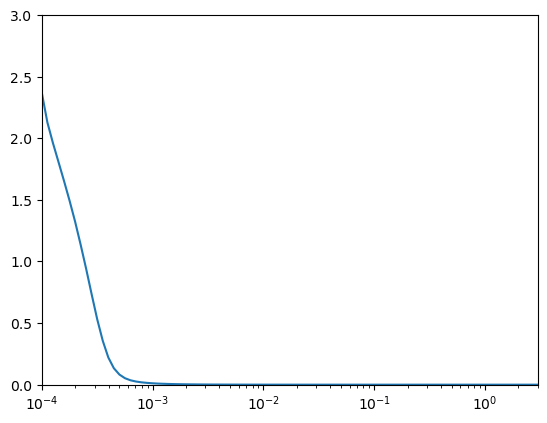

In [270]:
plt.semilogx(lr_history.history["lr"], lr_history.history["loss"])
plt.axis([1e-4, 3, 0, 3])

A learning rate of 0.001 might be justified. Surprisingly the loss doesn't get unsteable in higher epochs.

In [139]:
# Train it
model_conv_base = create_model_conv_base

adam = keras.optimizers.Adam(lr=.001)
model_conv_base.compile(loss='sparse_categorical_crossentropy', optimizer=adam)

model_conv_base.fit(x_train, y_train, batch_size=32, epochs=2)
#model loss doesn't really change anymore in the 2nd epoch. Maybe change learning rate?

C:\Users\benja\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/2
25000/25000 [==============================] - 788s 31ms/step - loss: 0.4422
Epoch 2/2
25000/25000 [==============================] - 793s 32ms/step - loss: 0.3594


In [514]:
model_conv_base.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 9, 9, 64)          640       
                                                                 
 batch_normalization_25 (Bat  (None, 9, 9, 64)         256       
 chNormalization)                                                
                                                                 
 conv2d_35 (Conv2D)          (None, 9, 9, 64)          36928     
                                                                 
 batch_normalization_26 (Bat  (None, 9, 9, 64)         256       
 chNormalization)                                                
                                                                 
 conv2d_36 (Conv2D)          (None, 9, 9, 128)         8320      
                                                                 
 flatten_10 (Flatten)        (None, 10368)           

In [162]:
#Save it

model_conv_base.save('model/model_conv_base.h5')

In [163]:
#load it

model_conv_base = load_model('model/model_conv_base.h5')

Maybe we could make also a simplified version out of it.

In [309]:
def model_conv_base_simplified ():

    model_conv_base_simplified = keras.models.Sequential([ 
        keras.layers.Conv2D(filters=64, kernel_size=(3,3),
                          activation="relu",
                          padding='same',
                          input_shape=(9,9,1)),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(filters=64, kernel_size=(3,3),
                          activation="relu",
                          padding='same'),
        keras.layers.Flatten(),
        keras.layers.Dense(81*9),
        keras.layers.Reshape((-1, 9)),
        #-1 is a placeholder for variable shapesize
        keras.layers.Activation('softmax')
    ]) 

    
    return model_conv_base_simplified

In [310]:
# Run the training with dynamic LR
lr_history = adjust_learning_rate(x_train[:1280], y_train[:1280], model_conv_base_simplified())

Epoch 1/100
40/40 [==============================] - 1s 21ms/step - loss: 2.2826 - mae: 3.9136 - lr: 1.0000e-04
Epoch 2/100
40/40 [==============================] - 1s 21ms/step - loss: 2.1791 - mae: 3.9136 - lr: 1.1220e-04
Epoch 3/100
40/40 [==============================] - 1s 20ms/step - loss: 2.1107 - mae: 3.9136 - lr: 1.2589e-04
Epoch 4/100
40/40 [==============================] - 1s 21ms/step - loss: 2.0342 - mae: 3.9136 - lr: 1.4125e-04
Epoch 5/100
40/40 [==============================] - 1s 20ms/step - loss: 1.9413 - mae: 3.9136 - lr: 1.5849e-04
Epoch 6/100
40/40 [==============================] - 1s 19ms/step - loss: 1.8380 - mae: 3.9136 - lr: 1.7783e-04
Epoch 7/100
40/40 [==============================] - 1s 19ms/step - loss: 1.7267 - mae: 3.9136 - lr: 1.9953e-04
Epoch 8/100
40/40 [==============================] - 1s 19ms/step - loss: 1.6130 - mae: 3.9136 - lr: 2.2387e-04
Epoch 9/100
40/40 [==============================] - 1s 20ms/step - loss: 1.4893 - mae: 3.9136 - lr: 2.5

(0.0001, 3.0, 0.0, 3.0)

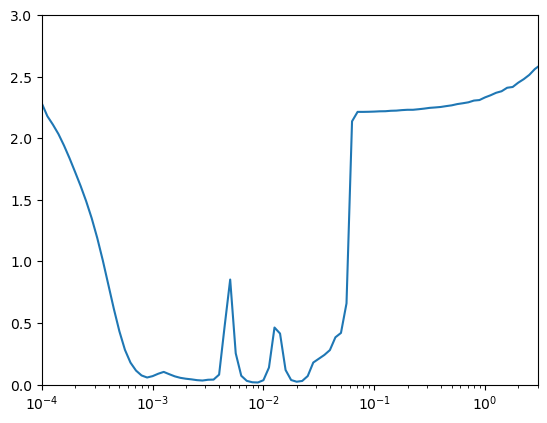

In [311]:
plt.semilogx(lr_history.history["lr"], lr_history.history["loss"])
plt.axis([1e-4, 3, 0, 3])

That looks already a lot worse than our base model. Since learning is not that stable anymore. Maybe a learning rate of  5 x 10^(-4) is a good starting point.

In [312]:
#Train it

model_conv_base_simplified = model_conv_base_simplified()

adam = keras.optimizers.Adam(lr=.0005)
model_conv_base_simplified.compile(loss='sparse_categorical_crossentropy', optimizer=adam)

model_conv_base_simplified.fit(x_train, y_train, batch_size=32, epochs=2)

Epoch 1/2
25000/25000 [==============================] - 504s 20ms/step - loss: 0.5391
Epoch 2/2
25000/25000 [==============================] - 506s 20ms/step - loss: 0.3679


In [515]:
model_conv_base_simplified.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_63 (Conv2D)          (None, 9, 9, 64)          640       
                                                                 
 batch_normalization_42 (Bat  (None, 9, 9, 64)         256       
 chNormalization)                                                
                                                                 
 conv2d_64 (Conv2D)          (None, 9, 9, 64)          36928     
                                                                 
 flatten_25 (Flatten)        (None, 5184)              0         
                                                                 
 dense_31 (Dense)            (None, 729)               3779865   
                                                                 
 reshape_27 (Reshape)        (None, 81, 9)             0         
                                                     

In [313]:
#Save it

model_conv_base_simplified.save('model/model_conv_base_simplified.h5')

In [277]:
#load it

model_conv_base_simplified = load_model('model/model_conv_base_simplified.h5')

Test the prediction quality

In [314]:
#given value
x = denorm(x_test[0])
x = np.asmatrix(x)
x = np.array(x)
x

array([[0., 0., 4., 0., 0., 0., 0., 0., 8.],
       [7., 0., 0., 2., 0., 9., 0., 0., 6.],
       [0., 1., 0., 0., 8., 0., 4., 5., 0.],
       [8., 0., 0., 0., 6., 0., 5., 0., 0.],
       [0., 7., 9., 0., 0., 4., 0., 0., 1.],
       [0., 0., 1., 0., 0., 5., 2., 3., 9.],
       [0., 0., 0., 6., 0., 2., 9., 0., 0.],
       [3., 0., 8., 0., 5., 7., 0., 2., 0.],
       [0., 0., 6., 4., 0., 0., 1., 0., 3.]])

In [315]:
#prediction
pred = inference_sudoku(x_test[0],model_conv_base_simplified,iterative=True, keepGiven = False)
pred 

1/1 [==============================] - 0s 20ms/step


array([[6, 2, 4, 5, 1, 3, 7, 9, 8],
       [7, 8, 5, 2, 4, 9, 3, 1, 6],
       [9, 1, 3, 7, 8, 6, 4, 5, 2],
       [8, 3, 2, 9, 6, 1, 5, 4, 7],
       [5, 7, 9, 3, 2, 4, 8, 6, 1],
       [4, 6, 1, 8, 7, 5, 2, 3, 9],
       [1, 4, 7, 6, 3, 2, 9, 8, 5],
       [3, 9, 8, 1, 5, 7, 6, 2, 4],
       [2, 5, 6, 4, 9, 8, 1, 7, 3]], dtype=int64)

From first glance this looks still quite well.

In [320]:
#true values
y_test[0].reshape((9,9))+1

array([[6, 2, 4, 5, 1, 3, 7, 9, 8],
       [7, 8, 5, 2, 4, 9, 3, 1, 6],
       [9, 1, 3, 7, 8, 6, 4, 5, 2],
       [8, 3, 2, 9, 6, 1, 5, 4, 7],
       [5, 7, 9, 3, 2, 4, 8, 6, 1],
       [4, 6, 1, 8, 7, 5, 2, 3, 9],
       [1, 4, 7, 6, 3, 2, 9, 8, 5],
       [3, 9, 8, 1, 5, 7, 6, 2, 4],
       [2, 5, 6, 4, 9, 8, 1, 7, 3]])

Still quite a good prediction.

Simplify it even more

In [324]:
def model_conv_base_simplified_more():

    model_conv_base_simplified_more = keras.models.Sequential([ 
        keras.layers.Conv2D(filters=64, kernel_size=(3,3),
                          activation="relu",
                          padding='same',
                          input_shape=(9,9,1)),
        keras.layers.BatchNormalization(),
        keras.layers.Flatten(),
        keras.layers.Dense(81*9),
        keras.layers.Reshape((-1, 9)),
        #-1 is a placeholder for variable shapesize
        keras.layers.Activation('softmax')
    ]) 
    
    return model_conv_base_simplified_more

In [325]:
# Run the training with dynamic LR
lr_history = adjust_learning_rate(x_train[:1280], y_train[:1280], model_conv_base_simplified_more())

Epoch 1/100
40/40 [==============================] - 1s 15ms/step - loss: 2.4651 - mae: 3.9136 - lr: 1.0000e-04
Epoch 2/100
40/40 [==============================] - 1s 17ms/step - loss: 2.2093 - mae: 3.9136 - lr: 1.1220e-04
Epoch 3/100
40/40 [==============================] - 1s 15ms/step - loss: 2.0602 - mae: 3.9136 - lr: 1.2589e-04
Epoch 4/100
40/40 [==============================] - 1s 15ms/step - loss: 1.9482 - mae: 3.9136 - lr: 1.4125e-04
Epoch 5/100
40/40 [==============================] - 1s 17ms/step - loss: 1.8575 - mae: 3.9136 - lr: 1.5849e-04
Epoch 6/100
40/40 [==============================] - 1s 17ms/step - loss: 1.7786 - mae: 3.9136 - lr: 1.7783e-04
Epoch 7/100
40/40 [==============================] - 1s 16ms/step - loss: 1.7036 - mae: 3.9136 - lr: 1.9953e-04
Epoch 8/100
40/40 [==============================] - 1s 16ms/step - loss: 1.6235 - mae: 3.9136 - lr: 2.2387e-04
Epoch 9/100
40/40 [==============================] - 1s 15ms/step - loss: 1.5364 - mae: 3.9136 - lr: 2.5

(0.0001, 3.0, 0.0, 3.0)

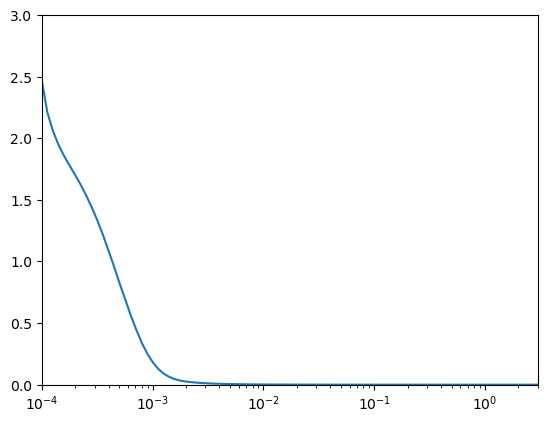

In [326]:
plt.semilogx(lr_history.history["lr"], lr_history.history["loss"])
plt.axis([1e-4, 3, 0, 3])

Somehow the more simplified version performs better here. But I don't think you will have this result every time you go through the data.
A learning rate should be 0.001.

In [327]:
#Train it
model_conv_base_simplified_more = model_conv_base_simplified_more()

adam = keras.optimizers.Adam(lr=.001)
model_conv_base_simplified_more.compile(loss='sparse_categorical_crossentropy', optimizer=adam)

model_conv_base_simplified_more.fit(x_train, y_train, batch_size=32, epochs=2)

Epoch 1/2
25000/25000 [==============================] - 394s 16ms/step - loss: 1.3120
Epoch 2/2
25000/25000 [==============================] - 389s 16ms/step - loss: 1.0479


In [516]:
model_conv_base_simplified_more.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_67 (Conv2D)          (None, 9, 9, 64)          640       
                                                                 
 batch_normalization_45 (Bat  (None, 9, 9, 64)         256       
 chNormalization)                                                
                                                                 
 flatten_28 (Flatten)        (None, 5184)              0         
                                                                 
 dense_34 (Dense)            (None, 729)               3779865   
                                                                 
 reshape_30 (Reshape)        (None, 81, 9)             0         
                                                                 
 activation_30 (Activation)  (None, 81, 9)             0         
                                                     

In [328]:
#Save it

model_conv_base_simplified_more.save('model/model_conv_base_simplified_more.h5')

In [167]:
#load it

model_conv_base_simplified_more = load_model('model/model_conv_base_simplified_more.h5')

Test the prediction quality

In [329]:
#given numbers
x = denorm(x_test[0])
x = np.asmatrix(x)
x = np.array(x)
x

array([[0., 0., 4., 0., 0., 0., 0., 0., 8.],
       [7., 0., 0., 2., 0., 9., 0., 0., 6.],
       [0., 1., 0., 0., 8., 0., 4., 5., 0.],
       [8., 0., 0., 0., 6., 0., 5., 0., 0.],
       [0., 7., 9., 0., 0., 4., 0., 0., 1.],
       [0., 0., 1., 0., 0., 5., 2., 3., 9.],
       [0., 0., 0., 6., 0., 2., 9., 0., 0.],
       [3., 0., 8., 0., 5., 7., 0., 2., 0.],
       [0., 0., 6., 4., 0., 0., 1., 0., 3.]])

In [330]:
#predicted value
pred = inference_sudoku(x_test[0],model_conv_base_simplified_more,iterative=True, keepGiven = False)
pred 

1/1 [==============================] - 0s 18ms/step


array([[5, 5, 4, 7, 2, 6, 2, 9, 8],
       [7, 8, 2, 1, 4, 9, 1, 1, 6],
       [9, 2, 6, 1, 8, 1, 4, 5, 5],
       [8, 2, 4, 9, 6, 1, 5, 7, 4],
       [4, 7, 9, 8, 1, 4, 6, 6, 2],
       [3, 6, 2, 4, 7, 5, 2, 2, 9],
       [3, 4, 7, 6, 1, 2, 9, 8, 4],
       [3, 9, 8, 4, 4, 7, 6, 2, 2],
       [1, 3, 6, 4, 9, 8, 1, 4, 1]], dtype=int64)

In [331]:
#true values
y_test[0].reshape((9,9))+1

array([[6, 2, 4, 5, 1, 3, 7, 9, 8],
       [7, 8, 5, 2, 4, 9, 3, 1, 6],
       [9, 1, 3, 7, 8, 6, 4, 5, 2],
       [8, 3, 2, 9, 6, 1, 5, 4, 7],
       [5, 7, 9, 3, 2, 4, 8, 6, 1],
       [4, 6, 1, 8, 7, 5, 2, 3, 9],
       [1, 4, 7, 6, 3, 2, 9, 8, 5],
       [3, 9, 8, 1, 5, 7, 6, 2, 4],
       [2, 5, 6, 4, 9, 8, 1, 7, 3]])

There are some deviations here already

Let the structure of the simplified base modell be the same, but with less filters. 32 Instead of 64

In [338]:
def model_conv_base_simplified_lessFilters ():

    model_conv_base_simplified_lessFilters = keras.models.Sequential([ 
        keras.layers.Conv2D(filters=32, kernel_size=(3,3),
                          activation="relu",
                          padding='same',
                          input_shape=(9,9,1)),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(filters=32, kernel_size=(3,3),
                          activation="relu",
                          padding='same'),

        keras.layers.Flatten(),
        keras.layers.Dense(81*9),
        keras.layers.Reshape((-1, 9)),
        #-1 is a placeholder for variable shapesize
        keras.layers.Activation('softmax')
    ]) 
    
    return model_conv_base_simplified_lessFilters

In [339]:
# Run the training with dynamic LR
lr_history = adjust_learning_rate(x_train[:1280], y_train[:1280], model_conv_base_simplified_lessFilters())

Epoch 1/100
40/40 [==============================] - 1s 12ms/step - loss: 2.3053 - mae: 3.9136 - lr: 1.0000e-04
Epoch 2/100
40/40 [==============================] - 1s 13ms/step - loss: 2.2238 - mae: 3.9136 - lr: 1.1220e-04
Epoch 3/100
40/40 [==============================] - 0s 12ms/step - loss: 2.1758 - mae: 3.9136 - lr: 1.2589e-04
Epoch 4/100
40/40 [==============================] - 0s 11ms/step - loss: 2.1329 - mae: 3.9136 - lr: 1.4125e-04
Epoch 5/100
40/40 [==============================] - 0s 12ms/step - loss: 2.0865 - mae: 3.9136 - lr: 1.5849e-04
Epoch 6/100
40/40 [==============================] - 0s 12ms/step - loss: 2.0307 - mae: 3.9136 - lr: 1.7783e-04
Epoch 7/100
40/40 [==============================] - 0s 12ms/step - loss: 1.9645 - mae: 3.9136 - lr: 1.9953e-04
Epoch 8/100
40/40 [==============================] - 0s 11ms/step - loss: 1.8865 - mae: 3.9136 - lr: 2.2387e-04
Epoch 9/100
40/40 [==============================] - 0s 12ms/step - loss: 1.8024 - mae: 3.9136 - lr: 2.5

(0.0001, 3.0, 0.0, 3.0)

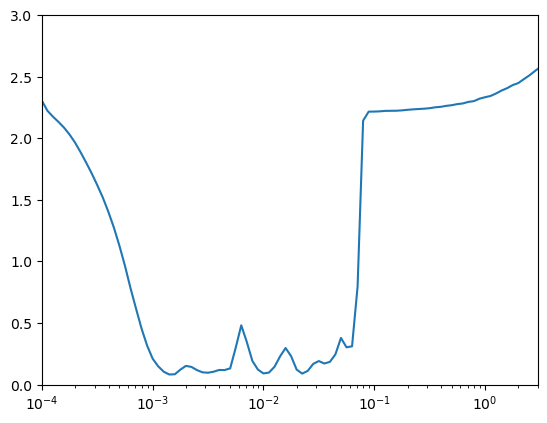

In [340]:
plt.semilogx(lr_history.history["lr"], lr_history.history["loss"])
plt.axis([1e-4, 3, 0, 3])

Looks similar to the simplified method. A decrease in filters might not be that problematic.
Optimal learning rate would be 0.0005

In [341]:
#Train it
model_conv_base_simplified_lessFilters = model_conv_base_simplified_lessFilters()

adam = keras.optimizers.Adam(lr=.0005)
model_conv_base_simplified_lessFilters.compile(loss='sparse_categorical_crossentropy', optimizer=adam)

model_conv_base_simplified_lessFilters.fit(x_train, y_train, batch_size=32, epochs=2)

Epoch 1/2
25000/25000 [==============================] - 292s 12ms/step - loss: 0.6743
Epoch 2/2
25000/25000 [==============================] - 283s 11ms/step - loss: 0.4228


In [517]:
model_conv_base_simplified_lessFilters.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_72 (Conv2D)          (None, 9, 9, 32)          320       
                                                                 
 batch_normalization_48 (Bat  (None, 9, 9, 32)         128       
 chNormalization)                                                
                                                                 
 conv2d_73 (Conv2D)          (None, 9, 9, 32)          9248      
                                                                 
 flatten_31 (Flatten)        (None, 2592)              0         
                                                                 
 dense_37 (Dense)            (None, 729)               1890297   
                                                                 
 reshape_33 (Reshape)        (None, 81, 9)             0         
                                                     

In [342]:
#Save it

model_conv_base_simplified_lessFilters.save('model/model_conv_base_simplified_lessFilters.h5')

In [ ]:
#load it

model_conv_base_simplified_lessFilters = load_model('model/model_conv_base_simplified_lessFilters.h5')

Test the prediction quality

In [343]:
#given values
x = denorm(x_test[0])
x = np.asmatrix(x)
x = np.array(x)
x

array([[0., 0., 4., 0., 0., 0., 0., 0., 8.],
       [7., 0., 0., 2., 0., 9., 0., 0., 6.],
       [0., 1., 0., 0., 8., 0., 4., 5., 0.],
       [8., 0., 0., 0., 6., 0., 5., 0., 0.],
       [0., 7., 9., 0., 0., 4., 0., 0., 1.],
       [0., 0., 1., 0., 0., 5., 2., 3., 9.],
       [0., 0., 0., 6., 0., 2., 9., 0., 0.],
       [3., 0., 8., 0., 5., 7., 0., 2., 0.],
       [0., 0., 6., 4., 0., 0., 1., 0., 3.]])

In [345]:
#predicted value
pred = inference_sudoku(x_test[0],model_conv_base_simplified_lessFilters,iterative=True, keepGiven = False)
pred 

1/1 [==============================] - 0s 17ms/step


array([[6, 2, 4, 5, 1, 3, 7, 9, 8],
       [7, 8, 5, 2, 4, 9, 3, 1, 6],
       [9, 1, 3, 7, 8, 6, 4, 5, 2],
       [8, 3, 2, 9, 6, 1, 5, 4, 7],
       [5, 7, 9, 3, 2, 4, 8, 6, 1],
       [4, 6, 1, 8, 7, 5, 2, 3, 9],
       [1, 4, 7, 6, 3, 2, 9, 8, 5],
       [3, 9, 8, 1, 5, 7, 6, 2, 4],
       [2, 5, 6, 4, 9, 8, 1, 7, 3]], dtype=int64)

In [346]:
#true values
y_test[0].reshape((9,9))+1

array([[6, 2, 4, 5, 1, 3, 7, 9, 8],
       [7, 8, 5, 2, 4, 9, 3, 1, 6],
       [9, 1, 3, 7, 8, 6, 4, 5, 2],
       [8, 3, 2, 9, 6, 1, 5, 4, 7],
       [5, 7, 9, 3, 2, 4, 8, 6, 1],
       [4, 6, 1, 8, 7, 5, 2, 3, 9],
       [1, 4, 7, 6, 3, 2, 9, 8, 5],
       [3, 9, 8, 1, 5, 7, 6, 2, 4],
       [2, 5, 6, 4, 9, 8, 1, 7, 3]])

Looks like, this still functions properly.

Make a version of the simplified model with even less filters.

In [347]:
def model_conv_base_simplified_even_lessFilters ():

    model_conv_base_simplified_even_lessFilters = keras.models.Sequential([ 
        keras.layers.Conv2D(filters=16, kernel_size=(3,3),
                          activation="relu",
                          padding='same',
                          input_shape=(9,9,1)),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(filters=16, kernel_size=(3,3),
                          activation="relu",
                          padding='same'),

        keras.layers.Flatten(),
        keras.layers.Dense(81*9),
        keras.layers.Reshape((-1, 9)),
        #-1 is a placeholder for variable shapesize
        keras.layers.Activation('softmax')
    ]) 
    
    return model_conv_base_simplified_even_lessFilters
 

In [348]:
# Run the training with dynamic LR
lr_history = adjust_learning_rate(x_train[:1280], y_train[:1280], model_conv_base_simplified_even_lessFilters())

Epoch 1/100
40/40 [==============================] - 1s 8ms/step - loss: 2.3053 - mae: 3.9136 - lr: 1.0000e-04
Epoch 2/100
40/40 [==============================] - 0s 8ms/step - loss: 2.2475 - mae: 3.9136 - lr: 1.1220e-04
Epoch 3/100
40/40 [==============================] - 0s 9ms/step - loss: 2.2156 - mae: 3.9136 - lr: 1.2589e-04
Epoch 4/100
40/40 [==============================] - 0s 8ms/step - loss: 2.1878 - mae: 3.9136 - lr: 1.4125e-04
Epoch 5/100
40/40 [==============================] - 0s 7ms/step - loss: 2.1613 - mae: 3.9136 - lr: 1.5849e-04
Epoch 6/100
40/40 [==============================] - 0s 7ms/step - loss: 2.1338 - mae: 3.9136 - lr: 1.7783e-04
Epoch 7/100
40/40 [==============================] - 0s 7ms/step - loss: 2.1031 - mae: 3.9136 - lr: 1.9953e-04
Epoch 8/100
40/40 [==============================] - 0s 7ms/step - loss: 2.0656 - mae: 3.9136 - lr: 2.2387e-04
Epoch 9/100
40/40 [==============================] - 0s 8ms/step - loss: 2.0191 - mae: 3.9136 - lr: 2.5119e-04
E

(0.0001, 3.0, 0.0, 3.0)

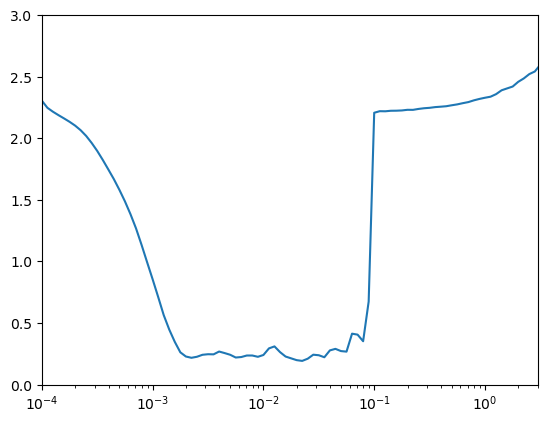

In [349]:
plt.semilogx(lr_history.history["lr"], lr_history.history["loss"])
plt.axis([1e-4, 3, 0, 3])

Okay, minimum loss here is already not as good as it could  be.
Learning rate should be 0.001

In [350]:
#Train it
model_conv_base_simplified_even_lessFilters = model_conv_base_simplified_even_lessFilters()

adam = keras.optimizers.Adam(lr=.001)
model_conv_base_simplified_even_lessFilters.compile(loss='sparse_categorical_crossentropy', optimizer=adam)

model_conv_base_simplified_even_lessFilters.fit(x_train, y_train, batch_size=32, epochs=2)

Epoch 1/2
25000/25000 [==============================] - 185s 7ms/step - loss: 0.7142
Epoch 2/2
25000/25000 [==============================] - 181s 7ms/step - loss: 0.4391


In [518]:
model_conv_base_simplified_even_lessFilters.summary()

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_76 (Conv2D)          (None, 9, 9, 16)          160       
                                                                 
 batch_normalization_50 (Bat  (None, 9, 9, 16)         64        
 chNormalization)                                                
                                                                 
 conv2d_77 (Conv2D)          (None, 9, 9, 16)          2320      
                                                                 
 flatten_33 (Flatten)        (None, 1296)              0         
                                                                 
 dense_39 (Dense)            (None, 729)               945513    
                                                                 
 reshape_35 (Reshape)        (None, 81, 9)             0         
                                                     

In [351]:
#Save it

model_conv_base_simplified_even_lessFilters.save('model/model_conv_base_simplified_even_lessFilters.h5')

In [ ]:
#load it

model_conv_base_simplified_even_lessFilters = load_model('model/model_conv_base_simplified_even_lessFilters.h5')

Test the prediction quality

In [352]:
#given values
x = denorm(x_test[0])
x = np.asmatrix(x)
x = np.array(x)
x

array([[0., 0., 4., 0., 0., 0., 0., 0., 8.],
       [7., 0., 0., 2., 0., 9., 0., 0., 6.],
       [0., 1., 0., 0., 8., 0., 4., 5., 0.],
       [8., 0., 0., 0., 6., 0., 5., 0., 0.],
       [0., 7., 9., 0., 0., 4., 0., 0., 1.],
       [0., 0., 1., 0., 0., 5., 2., 3., 9.],
       [0., 0., 0., 6., 0., 2., 9., 0., 0.],
       [3., 0., 8., 0., 5., 7., 0., 2., 0.],
       [0., 0., 6., 4., 0., 0., 1., 0., 3.]])

In [353]:
#predicted value
pred = inference_sudoku(x_test[0],model_conv_base_simplified_even_lessFilters,iterative=True, keepGiven = False)
pred 

1/1 [==============================] - 0s 17ms/step


array([[6, 2, 4, 5, 1, 3, 7, 9, 8],
       [7, 8, 5, 2, 4, 9, 3, 1, 6],
       [9, 1, 3, 7, 8, 6, 4, 5, 2],
       [8, 3, 2, 9, 6, 1, 5, 4, 7],
       [5, 7, 9, 3, 2, 4, 8, 6, 1],
       [4, 6, 1, 8, 7, 5, 2, 3, 9],
       [1, 4, 7, 6, 3, 2, 9, 8, 5],
       [3, 9, 8, 1, 5, 7, 6, 2, 4],
       [2, 5, 6, 4, 9, 8, 1, 7, 3]], dtype=int64)

In [354]:
#true values
y_test[0].reshape((9,9))+1

array([[6, 2, 4, 5, 1, 3, 7, 9, 8],
       [7, 8, 5, 2, 4, 9, 3, 1, 6],
       [9, 1, 3, 7, 8, 6, 4, 5, 2],
       [8, 3, 2, 9, 6, 1, 5, 4, 7],
       [5, 7, 9, 3, 2, 4, 8, 6, 1],
       [4, 6, 1, 8, 7, 5, 2, 3, 9],
       [1, 4, 7, 6, 3, 2, 9, 8, 5],
       [3, 9, 8, 1, 5, 7, 6, 2, 4],
       [2, 5, 6, 4, 9, 8, 1, 7, 3]])

This still performs quite well.

Make a version with 8 instead of 16 filters

In [355]:
def model_conv_base_simplified_even_lesser_Filters ():

    model_conv_base_simplified_even_lesser_Filters = keras.models.Sequential([ 
        keras.layers.Conv2D(filters=8, kernel_size=(3,3),
                          activation="relu",
                          padding='same',
                          input_shape=(9,9,1)),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(filters=8, kernel_size=(3,3),
                          activation="relu",
                          padding='same'),

        keras.layers.Flatten(),
        keras.layers.Dense(81*9),
        keras.layers.Reshape((-1, 9)),
        #-1 is a placeholder for variable shapesize
        keras.layers.Activation('softmax')
    ]) 
    
    return model_conv_base_simplified_even_lesser_Filters




In [356]:
# Run the training with dynamic LR
lr_history = adjust_learning_rate(x_train[:1280], y_train[:1280], model_conv_base_simplified_even_lesser_Filters())

Epoch 1/100
40/40 [==============================] - 1s 5ms/step - loss: 2.3182 - mae: 3.9136 - lr: 1.0000e-04
Epoch 2/100
40/40 [==============================] - 0s 5ms/step - loss: 2.2670 - mae: 3.9136 - lr: 1.1220e-04
Epoch 3/100
40/40 [==============================] - 0s 5ms/step - loss: 2.2419 - mae: 3.9136 - lr: 1.2589e-04
Epoch 4/100
40/40 [==============================] - 0s 6ms/step - loss: 2.2205 - mae: 3.9136 - lr: 1.4125e-04
Epoch 5/100
40/40 [==============================] - 0s 6ms/step - loss: 2.2003 - mae: 3.9136 - lr: 1.5849e-04
Epoch 6/100
40/40 [==============================] - 0s 5ms/step - loss: 2.1812 - mae: 3.9136 - lr: 1.7783e-04
Epoch 7/100
40/40 [==============================] - 0s 5ms/step - loss: 2.1623 - mae: 3.9136 - lr: 1.9953e-04
Epoch 8/100
40/40 [==============================] - 0s 5ms/step - loss: 2.1425 - mae: 3.9136 - lr: 2.2387e-04
Epoch 9/100
40/40 [==============================] - 0s 5ms/step - loss: 2.1204 - mae: 3.9136 - lr: 2.5119e-04
E

(0.0001, 3.0, 0.0, 3.0)

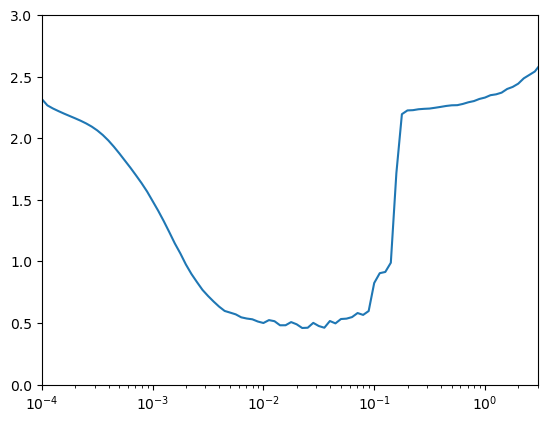

In [357]:
plt.semilogx(lr_history.history["lr"], lr_history.history["loss"])
plt.axis([1e-4, 3, 0, 3])

Learning curve doesn't look much different than the one with 16 filters. 
Learning rate of 0.001 seems to be suitable.

In [358]:
#Train it
model_conv_base_simplified_even_lesser_Filters = model_conv_base_simplified_even_lesser_Filters()

adam = keras.optimizers.Adam(lr=.001)
model_conv_base_simplified_even_lesser_Filters.compile(loss='sparse_categorical_crossentropy', optimizer=adam)

model_conv_base_simplified_even_lesser_Filters.fit(x_train, y_train, batch_size=32, epochs=2)

Epoch 1/2
25000/25000 [==============================] - 130s 5ms/step - loss: 0.9946
Epoch 2/2
25000/25000 [==============================] - 129s 5ms/step - loss: 0.7498


In [519]:
model_conv_base_simplified_even_lesser_Filters.summary()

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_80 (Conv2D)          (None, 9, 9, 8)           80        
                                                                 
 batch_normalization_52 (Bat  (None, 9, 9, 8)          32        
 chNormalization)                                                
                                                                 
 conv2d_81 (Conv2D)          (None, 9, 9, 8)           584       
                                                                 
 flatten_35 (Flatten)        (None, 648)               0         
                                                                 
 dense_41 (Dense)            (None, 729)               473121    
                                                                 
 reshape_37 (Reshape)        (None, 81, 9)             0         
                                                     

In [359]:
#Save it

model_conv_base_simplified_even_lesser_Filters.save('model/model_conv_base_simplified_even_lesser_Filters.h5')

In [ ]:
#load it

model_conv_base_simplified_even_lesser_Filters = load_model('model/model_conv_base_simplified_even_lesser_Filters.h5')

Test the prediction quality

In [360]:
#given values
x = denorm(x_test[0])
x = np.asmatrix(x)
x = np.array(x)
x

array([[0., 0., 4., 0., 0., 0., 0., 0., 8.],
       [7., 0., 0., 2., 0., 9., 0., 0., 6.],
       [0., 1., 0., 0., 8., 0., 4., 5., 0.],
       [8., 0., 0., 0., 6., 0., 5., 0., 0.],
       [0., 7., 9., 0., 0., 4., 0., 0., 1.],
       [0., 0., 1., 0., 0., 5., 2., 3., 9.],
       [0., 0., 0., 6., 0., 2., 9., 0., 0.],
       [3., 0., 8., 0., 5., 7., 0., 2., 0.],
       [0., 0., 6., 4., 0., 0., 1., 0., 3.]])

In [361]:
#predicted value
pred = inference_sudoku(x_test[0],model_conv_base_simplified_even_lesser_Filters,iterative=True, keepGiven = False)
pred 

1/1 [==============================] - 0s 17ms/step


array([[6, 3, 4, 5, 7, 1, 2, 9, 8],
       [7, 8, 5, 2, 4, 9, 6, 1, 6],
       [9, 1, 1, 8, 8, 6, 4, 5, 2],
       [8, 2, 2, 9, 6, 1, 5, 4, 7],
       [5, 7, 9, 8, 3, 4, 8, 6, 1],
       [4, 6, 1, 7, 8, 5, 2, 3, 9],
       [1, 4, 7, 6, 2, 2, 9, 8, 5],
       [3, 9, 8, 1, 5, 7, 8, 2, 4],
       [3, 5, 6, 4, 9, 8, 1, 7, 3]], dtype=int64)

In [362]:
#true values
y_test[0].reshape((9,9))+1

array([[6, 2, 4, 5, 1, 3, 7, 9, 8],
       [7, 8, 5, 2, 4, 9, 3, 1, 6],
       [9, 1, 3, 7, 8, 6, 4, 5, 2],
       [8, 3, 2, 9, 6, 1, 5, 4, 7],
       [5, 7, 9, 3, 2, 4, 8, 6, 1],
       [4, 6, 1, 8, 7, 5, 2, 3, 9],
       [1, 4, 7, 6, 3, 2, 9, 8, 5],
       [3, 9, 8, 1, 5, 7, 6, 2, 4],
       [2, 5, 6, 4, 9, 8, 1, 7, 3]])

Here it starts to make more mistakes.

I
I
I
I
I
I

Make a more complex model than the base model

In [30]:
def model_conv_base_longer():  
    
    model_conv_base_longer = keras.models.Sequential([ 
        keras.layers.Conv2D(filters=64, kernel_size=(3,3),
                          activation="relu",
                          padding='same',
                          input_shape=(9,9,1)),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(filters=64, kernel_size=(3,3),
                          activation="relu",
                          padding='same'),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(filters=64, kernel_size=(3,3),
                          activation="relu",
                          padding='same'),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(filters=128, kernel_size=(1,1),
                          activation="relu",
                          padding='same'), 
        keras.layers.Flatten(),
        keras.layers.Dense(81*9),
        keras.layers.Reshape((-1, 9)),
        #-1 is a placeholder for variable shapesize
        keras.layers.Activation('softmax')
    ]) 
    
    return model_conv_base_longer

In [504]:
# Run the training with dynamic LR
lr_history = adjust_learning_rate(x_train[:1280], y_train[:1280], model_conv_base_longer())

Epoch 1/100
40/40 [==============================] - 6s 140ms/step - loss: 2.3764 - mae: 3.9136 - lr: 1.0000e-04
Epoch 2/100
40/40 [==============================] - 6s 139ms/step - loss: 2.1286 - mae: 3.9136 - lr: 1.1220e-04
Epoch 3/100
40/40 [==============================] - 6s 143ms/step - loss: 1.9439 - mae: 3.9136 - lr: 1.2589e-04
Epoch 4/100
40/40 [==============================] - 6s 140ms/step - loss: 1.7585 - mae: 3.9136 - lr: 1.4125e-04
Epoch 5/100
40/40 [==============================] - 6s 138ms/step - loss: 1.5677 - mae: 3.9136 - lr: 1.5849e-04
Epoch 6/100
40/40 [==============================] - 6s 141ms/step - loss: 1.3668 - mae: 3.9136 - lr: 1.7783e-04
Epoch 7/100
40/40 [==============================] - 6s 138ms/step - loss: 1.1501 - mae: 3.9136 - lr: 1.9953e-04
Epoch 8/100
40/40 [==============================] - 6s 138ms/step - loss: 0.9233 - mae: 3.9136 - lr: 2.2387e-04
Epoch 9/100
40/40 [==============================] - 6s 141ms/step - loss: 0.7016 - mae: 3.9136 

(0.0001, 10.0, 0.0, 3.0)

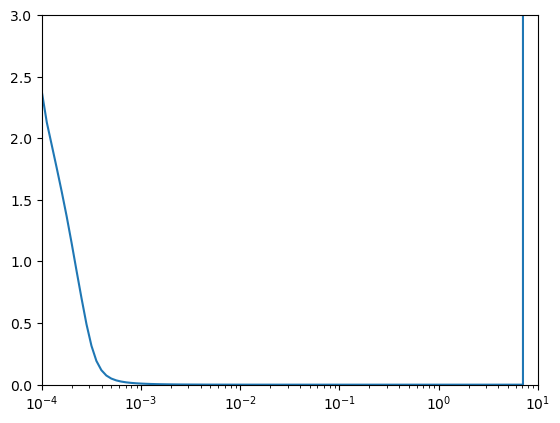

In [505]:
plt.semilogx(lr_history.history["lr"], lr_history.history["loss"])
plt.axis([1e-4, 10, 0, 3])

Maybe a learning rate of 0.0005 is a good idea.

In [31]:
#Train it
model_conv_base_longer = model_conv_base_longer()

adam = keras.optimizers.Adam(learning_rate=0.0005)
model_conv_base_longer.compile(loss='sparse_categorical_crossentropy', optimizer=adam)

model_conv_base_longer.fit(x_train, y_train, batch_size=32, epochs=2)

Epoch 1/2
25000/25000 [==============================] - 2009s 80ms/step - loss: 0.4741
Epoch 2/2
25000/25000 [==============================] - 2085s 83ms/step - loss: 0.3509


In [520]:
model_conv_base_longer.summary()

Model: "sequential_70"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_99 (Conv2D)          (None, 9, 9, 64)          640       
                                                                 
 batch_normalization_115 (Ba  (None, 9, 9, 64)         256       
 tchNormalization)                                               
                                                                 
 conv2d_100 (Conv2D)         (None, 9, 9, 64)          36928     
                                                                 
 batch_normalization_116 (Ba  (None, 9, 9, 64)         256       
 tchNormalization)                                               
                                                                 
 conv2d_101 (Conv2D)         (None, 9, 9, 64)          36928     
                                                                 
 batch_normalization_117 (Ba  (None, 9, 9, 64)       

In [33]:
#Save it

model_conv_base_longer.save('model/model_conv_base_longer')

INFO:tensorflow:Assets written to: model/model_conv_base_longer\assets


INFO:tensorflow:Assets written to: model/model_conv_base_longer\assets


In [34]:
#load it

model_conv_base_longer = load_model('model/model_conv_base_longer')

Test the prediction quality

In [42]:
#given values
x = denorm(x_test[0])
x = np.asmatrix(x)
x = np.array(x)
x

array([[0., 0., 4., 0., 0., 0., 0., 0., 8.],
       [7., 0., 0., 2., 0., 9., 0., 0., 6.],
       [0., 1., 0., 0., 8., 0., 4., 5., 0.],
       [8., 0., 0., 0., 6., 0., 5., 0., 0.],
       [0., 7., 9., 0., 0., 4., 0., 0., 1.],
       [0., 0., 1., 0., 0., 5., 2., 3., 9.],
       [0., 0., 0., 6., 0., 2., 9., 0., 0.],
       [3., 0., 8., 0., 5., 7., 0., 2., 0.],
       [0., 0., 6., 4., 0., 0., 1., 0., 3.]])

In [43]:
#predicted value
pred = inference_sudoku(x_test[0],model_conv_base_longer,iterative=True, keepGiven = False)
pred 

1/1 [==============================] - 0s 19ms/step


array([[6, 2, 4, 5, 1, 3, 7, 9, 8],
       [7, 8, 5, 2, 4, 9, 3, 1, 6],
       [9, 1, 3, 7, 8, 6, 4, 5, 2],
       [8, 3, 2, 9, 6, 1, 5, 4, 7],
       [5, 7, 9, 3, 2, 4, 8, 6, 1],
       [4, 6, 1, 8, 7, 5, 2, 3, 9],
       [1, 4, 7, 6, 3, 2, 9, 8, 5],
       [3, 9, 8, 1, 5, 7, 6, 2, 4],
       [2, 5, 6, 4, 9, 8, 1, 7, 3]], dtype=int64)

In [510]:
#true values
y_test[0].reshape((9,9))+1

array([[6, 2, 4, 5, 1, 3, 7, 9, 8],
       [7, 8, 5, 2, 4, 9, 3, 1, 6],
       [9, 1, 3, 7, 8, 6, 4, 5, 2],
       [8, 3, 2, 9, 6, 1, 5, 4, 7],
       [5, 7, 9, 3, 2, 4, 8, 6, 1],
       [4, 6, 1, 8, 7, 5, 2, 3, 9],
       [1, 4, 7, 6, 3, 2, 9, 8, 5],
       [3, 9, 8, 1, 5, 7, 6, 2, 4],
       [2, 5, 6, 4, 9, 8, 1, 7, 3]])

In [ ]:
I
I
I
I
I
I

One last attempt to make the CNN even complexer

In [58]:
def model_conv_base_complex():  
    
    model_conv_base_complex = keras.models.Sequential([ 
        keras.layers.Conv2D(filters=128, kernel_size=(2,2),
                          activation="relu",
                          padding='same',
                          input_shape=(9,9,1)),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(filters=128, kernel_size=(3,3),
                          activation="relu",
                          padding='same'),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(filters=128, kernel_size=(3,3),
                          activation="sigmoid",
                          padding='same'),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(filters=128, kernel_size=(3,3),
                          activation="relu",
                          padding='same'), 
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(filters=128, kernel_size=(1,1),
                          activation="relu",
                          padding='same'), 
        
        keras.layers.Flatten(),
        keras.layers.Dense(81*9),
        keras.layers.Reshape((-1, 9)),
        #-1 is a placeholder for variable shapesize
        keras.layers.Activation('softmax')
    ]) 
    
    return model_conv_base_complex

In [59]:
# Run the training with dynamic LR
lr_history = adjust_learning_rate(x_train[:1280], y_train[:1280], model_conv_base_complex())

Epoch 1/100
40/40 [==============================] - 8s 172ms/step - loss: 2.4412 - mae: 3.9136 - lr: 1.0000e-04
Epoch 2/100
40/40 [==============================] - 6s 157ms/step - loss: 2.1271 - mae: 3.9136 - lr: 1.1220e-04
Epoch 3/100
40/40 [==============================] - 7s 164ms/step - loss: 1.9106 - mae: 3.9136 - lr: 1.2589e-04
Epoch 4/100
40/40 [==============================] - 6s 159ms/step - loss: 1.6932 - mae: 3.9136 - lr: 1.4125e-04
Epoch 5/100
40/40 [==============================] - 6s 155ms/step - loss: 1.4669 - mae: 3.9136 - lr: 1.5849e-04
Epoch 6/100
40/40 [==============================] - 7s 165ms/step - loss: 1.2272 - mae: 3.9136 - lr: 1.7783e-04
Epoch 7/100
40/40 [==============================] - 6s 154ms/step - loss: 0.9793 - mae: 3.9136 - lr: 1.9953e-04
Epoch 8/100
40/40 [==============================] - 6s 161ms/step - loss: 0.7318 - mae: 3.9136 - lr: 2.2387e-04
Epoch 9/100
40/40 [==============================] - 6s 160ms/step - loss: 0.5101 - mae: 3.9136 

(0.0001, 10.0, 0.0, 3.0)

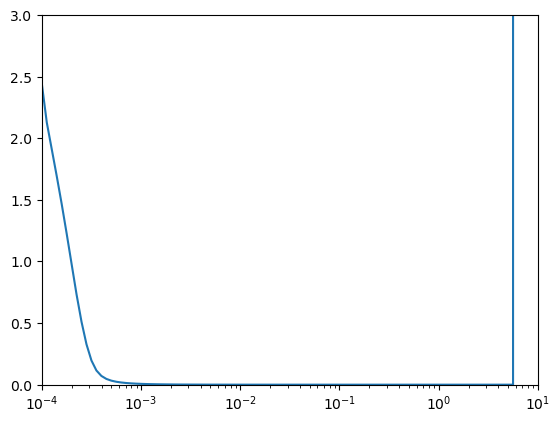

In [60]:
plt.semilogx(lr_history.history["lr"], lr_history.history["loss"])
plt.axis([1e-4, 10, 0, 3])

In [61]:
#Train it
model_conv_base_complex = model_conv_base_complex()

adam = keras.optimizers.Adam(learning_rate=0.0005)
model_conv_base_complex.compile(loss='sparse_categorical_crossentropy', optimizer=adam)

model_conv_base_complex.fit(x_train[:1280], y_train[:1280], batch_size=32, epochs=2)

Epoch 1/2
40/40 [==============================] - 8s 165ms/step - loss: 2.4469
Epoch 2/2
40/40 [==============================] - 6s 151ms/step - loss: 1.8961


Is there a minimum loss given the kind of problem Sudoku poses? No matter how complex you make the model, the loss stays around 0.33.

In [53]:
model_conv_base_complex.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 9, 9, 128)         4736      
                                                                 
 batch_normalization_49 (Ba  (None, 9, 9, 128)         512       
 tchNormalization)                                               
                                                                 
 conv2d_10 (Conv2D)          (None, 9, 9, 128)         589952    
                                                                 
 batch_normalization_50 (Ba  (None, 9, 9, 128)         512       
 tchNormalization)                                               
                                                                 
 conv2d_11 (Conv2D)          (None, 9, 9, 128)         147584    
                                                                 
 batch_normalization_51 (Ba  (None, 9, 9, 128)        

In [54]:
#Save it

model_conv_base_complex.save('model/model_conv_base_complex')

INFO:tensorflow:Assets written to: model/model_conv_base_complex\assets


INFO:tensorflow:Assets written to: model/model_conv_base_complex\assets


In [ ]:
#load it

model_conv_base_complex = load_model('model/model_conv_base_complex')

I
I
I
I
I

Try a 3x1 and 1x3 filter instead of 3x3 as discussed here: https://medium.com/analytics-vidhya/how-to-choose-the-size-of-the-convolution-filter-or-kernel-size-for-cnn-86a55a1e2d15

In [69]:
def model_conv_base_31_13 ():

    model_conv_base_31_13 = keras.models.Sequential([ 
        keras.layers.Conv2D(filters=64, kernel_size=(1,3),
                          activation="relu",
                          padding='same',
                          input_shape=(9,9,1)),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(filters=64, kernel_size=(3,1),
                          activation="relu",
                          padding='same'),
        keras.layers.BatchNormalization(),
        
        keras.layers.Conv2D(filters=64, kernel_size=(1,3),
                          activation="relu",
                          padding='same'),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(filters=64, kernel_size=(3,1),
                          activation="relu",
                          padding='same'),
        keras.layers.BatchNormalization(),
        
        
        keras.layers.Conv2D(filters=128, kernel_size=(1,1),
                          activation="relu",
                          padding='same'), 
        keras.layers.Flatten(),
        keras.layers.Dense(81*9),
        keras.layers.Reshape((-1, 9)),
        #-1 is a placeholder for variable shapesize
        keras.layers.Activation('softmax')
        
    ]) 
    
    
    return(model_conv_base_31_13)


In [65]:
# Run the training with dynamic LR
lr_history = adjust_learning_rate(x_train[:1280], y_train[:1280], model_conv_base_31_13())

Epoch 1/100
40/40 [==============================] - 5s 95ms/step - loss: 2.3837 - mae: 3.9136 - lr: 1.0000e-04
Epoch 2/100
40/40 [==============================] - 4s 97ms/step - loss: 2.1285 - mae: 3.9136 - lr: 1.1220e-04
Epoch 3/100
40/40 [==============================] - 4s 101ms/step - loss: 1.9314 - mae: 3.9136 - lr: 1.2589e-04
Epoch 4/100
40/40 [==============================] - 4s 97ms/step - loss: 1.7351 - mae: 3.9136 - lr: 1.4125e-04
Epoch 5/100
40/40 [==============================] - 4s 95ms/step - loss: 1.5294 - mae: 3.9136 - lr: 1.5849e-04
Epoch 6/100
40/40 [==============================] - 4s 101ms/step - loss: 1.3128 - mae: 3.9136 - lr: 1.7783e-04
Epoch 7/100
40/40 [==============================] - 4s 106ms/step - loss: 1.0867 - mae: 3.9136 - lr: 1.9953e-04
Epoch 8/100
40/40 [==============================] - 4s 104ms/step - loss: 0.8537 - mae: 3.9136 - lr: 2.2387e-04
Epoch 9/100
40/40 [==============================] - 4s 101ms/step - loss: 0.6322 - mae: 3.9136 - lr

(0.0001, 10.0, 0.0, 3.0)

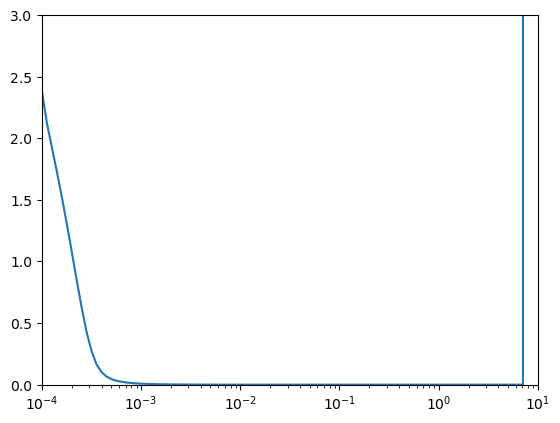

In [66]:
plt.semilogx(lr_history.history["lr"], lr_history.history["loss"])
plt.axis([1e-4, 10, 0, 3])

In [70]:
#Train it
model_conv_base_31_13 = model_conv_base_31_13()

adam = keras.optimizers.Adam(learning_rate=0.0005)
model_conv_base_31_13.compile(loss='sparse_categorical_crossentropy', optimizer=adam)

model_conv_base_31_13.fit(x_train, y_train, batch_size=32, epochs=2)

Epoch 1/2
25000/25000 [==============================] - 2601s 104ms/step - loss: 0.4597
Epoch 2/2
25000/25000 [==============================] - 2573s 103ms/step - loss: 0.3557


In [71]:
model_conv_base_31_13.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 9, 9, 64)          256       
                                                                 
 batch_normalization_69 (Ba  (None, 9, 9, 64)          256       
 tchNormalization)                                               
                                                                 
 conv2d_35 (Conv2D)          (None, 9, 9, 64)          12352     
                                                                 
 batch_normalization_70 (Ba  (None, 9, 9, 64)          256       
 tchNormalization)                                               
                                                                 
 conv2d_36 (Conv2D)          (None, 9, 9, 64)          12352     
                                                                 
 batch_normalization_71 (Ba  (None, 9, 9, 64)        

In [72]:
#Save it

model_conv_base_31_13.save('model/model_conv_base_31_13')

INFO:tensorflow:Assets written to: model/model_conv_base_31_13\assets


INFO:tensorflow:Assets written to: model/model_conv_base_31_13\assets


In [ ]:
#load it

model_conv_base_complex = load_model('model/model_conv_base_31_13')

I
I
I
I
I

Base model with dropout

In [75]:
 def model_conv_base_dropout ():

    
    model_conv_base_dropout = keras.models.Sequential([ 
        keras.layers.Conv2D(filters=64, kernel_size=(3,3),
                          activation="relu",
                          padding='same',
                          input_shape=(9,9,1)),
        keras.layers.Dropout(0.4),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(filters=64, kernel_size=(3,3),
                          activation="relu",
                          padding='same'),
        keras.layers.Dropout(0.4),
        keras.layers.BatchNormalization(),
        keras.layers.Conv2D(filters=128, kernel_size=(1,1),
                          activation="relu",
                          padding='same'),
        keras.layers.Dropout(0.4),
        keras.layers.Flatten(),
        keras.layers.Dense(81*9),
        keras.layers.Reshape((-1, 9)),
        #-1 is a placeholder for variable shapesize
        keras.layers.Activation('softmax')
    ]) 
    
    return(model_conv_base_dropout)

In [76]:
# Run the training with dynamic LR
lr_history = adjust_learning_rate(x_train[:1280], y_train[:1280], model_conv_base_dropout())

Epoch 1/100
40/40 [==============================] - 5s 96ms/step - loss: 2.5653 - mae: 3.9136 - lr: 1.0000e-04
Epoch 2/100
40/40 [==============================] - 4s 102ms/step - loss: 2.5011 - mae: 3.9136 - lr: 1.1220e-04
Epoch 3/100
40/40 [==============================] - 5s 119ms/step - loss: 2.4584 - mae: 3.9136 - lr: 1.2589e-04
Epoch 4/100
40/40 [==============================] - 4s 100ms/step - loss: 2.4110 - mae: 3.9136 - lr: 1.4125e-04
Epoch 5/100
40/40 [==============================] - 4s 99ms/step - loss: 2.3638 - mae: 3.9136 - lr: 1.5849e-04
Epoch 6/100
40/40 [==============================] - 4s 100ms/step - loss: 2.3157 - mae: 3.9136 - lr: 1.7783e-04
Epoch 7/100
40/40 [==============================] - 4s 101ms/step - loss: 2.2633 - mae: 3.9136 - lr: 1.9953e-04
Epoch 8/100
40/40 [==============================] - 4s 94ms/step - loss: 2.2108 - mae: 3.9136 - lr: 2.2387e-04
Epoch 9/100
40/40 [==============================] - 4s 98ms/step - loss: 2.1566 - mae: 3.9136 - lr

(0.0001, 10.0, 0.0, 3.0)

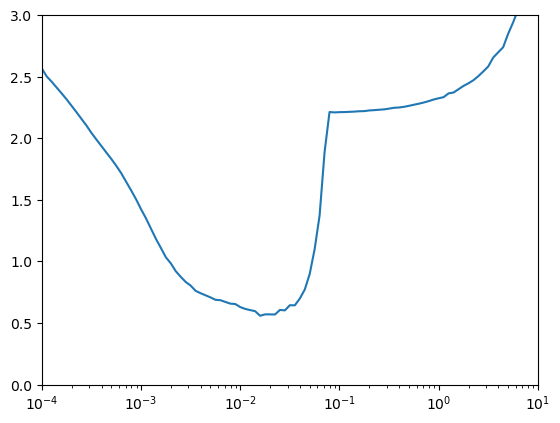

In [77]:
plt.semilogx(lr_history.history["lr"], lr_history.history["loss"])
plt.axis([1e-4, 10, 0, 3])

Dropout seems to have a negative impact on the performance of the base model.

In [78]:
#Train it
model_conv_base_dropout = model_conv_base_dropout()

#try also early stopping here
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
#no val_loss present, validation data not defined


adam = keras.optimizers.Adam(learning_rate=0.0005)
model_conv_base_dropout.compile(loss='sparse_categorical_crossentropy', optimizer=adam)

model_conv_base_dropout.fit(x_train, y_train, batch_size=32, epochs=2, callbacks=[es_callback])

Epoch 1/2
25000/25000 [==============================] - ETA: 0s - loss: 0.7913WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


25000/25000 [==============================] - 2602s 104ms/step - loss: 0.7913
Epoch 2/2
25000/25000 [==============================] - ETA: 0s - loss: 0.4972WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


25000/25000 [==============================] - 2523s 101ms/step - loss: 0.4972


In [79]:
model_conv_base_dropout.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 9, 9, 64)          640       
                                                                 
 dropout_3 (Dropout)         (None, 9, 9, 64)          0         
                                                                 
 batch_normalization_75 (Ba  (None, 9, 9, 64)          256       
 tchNormalization)                                               
                                                                 
 conv2d_43 (Conv2D)          (None, 9, 9, 64)          36928     
                                                                 
 dropout_4 (Dropout)         (None, 9, 9, 64)          0         
                                                                 
 batch_normalization_76 (Ba  (None, 9, 9, 64)          256       
 tchNormalization)                                   

In [80]:
#Save it

model_conv_base_dropout.save('model/model_conv_base_dropout')

INFO:tensorflow:Assets written to: model/model_conv_base_dropout\assets


INFO:tensorflow:Assets written to: model/model_conv_base_dropout\assets


In [ ]:
#load it

model_conv_base_dropout = load_model('model/model_conv_base_dropout')


####################################
Here shall the pruning section start
####################################



There exists  Keras Surgeon.
But how does identify work?
https://github.com/BenWhetton/keras-surgeon

There also exists tensorflow_model_optimization
https://www.tensorflow.org/model_optimization/guide/pruning/pruning_with_keras    

What models to choose? Base model and minimal viable model
model_conv_base
model_conv_base_simplified_even_lessFilters

Start with model_conv_base

In [451]:
prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude

# Compute end step to finish pruning after 2 epochs.
batch_size = 32
epochs = 2

num_images = x_train.shape[0]
end_step = np.ceil(num_images / batch_size).astype(np.int32) * epochs

# Define model for pruning.
pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.50,
                                                               final_sparsity=0.80,
                                                               begin_step=0,
                                                               end_step=end_step)
}

model_base_for_pruning = prune_low_magnitude(model_conv_base, **pruning_params)
#Is here a copy of model_conv_base created? Would be rather nice

# `prune_low_magnitude` requires a recompile.
adam = keras.optimizers.Adam(lr=.001)
model_base_for_pruning.compile(optimizer=adam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_base_for_pruning.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 prune_low_magnitude_conv2d_  (None, 9, 9, 64)         1218      
 34 (PruneLowMagnitude)                                          
                                                                 
 prune_low_magnitude_batch_n  (None, 9, 9, 64)         257       
 ormalization_25 (PruneLowMa                                     
 gnitude)                                                        
                                                                 
 prune_low_magnitude_conv2d_  (None, 9, 9, 64)         73794     
 35 (PruneLowMagnitude)                                          
                                                                 
 prune_low_magnitude_batch_n  (None, 9, 9, 64)         257       
 ormalization_26 (PruneLowMa                                     
 gnitude)                                            

In [454]:
logdir = tempfile.mkdtemp()

callbacks = [
  tfmot.sparsity.keras.UpdatePruningStep(),
  tfmot.sparsity.keras.PruningSummaries(log_dir=logdir),
]

model_base_for_pruning.fit(x_train, y_train,
                  batch_size=batch_size, epochs=epochs, callbacks=callbacks)


Epoch 1/2
25000/25000 [==============================] - 1272s 51ms/step - loss: 0.3492 - accuracy: 0.8345
Epoch 2/2
25000/25000 [==============================] - 1257s 50ms/step - loss: 0.3372 - accuracy: 0.8426


In [463]:
model_base_for_pruning.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 prune_low_magnitude_conv2d_  (None, 9, 9, 64)         1218      
 34 (PruneLowMagnitude)                                          
                                                                 
 prune_low_magnitude_batch_n  (None, 9, 9, 64)         257       
 ormalization_25 (PruneLowMa                                     
 gnitude)                                                        
                                                                 
 prune_low_magnitude_conv2d_  (None, 9, 9, 64)         73794     
 35 (PruneLowMagnitude)                                          
                                                                 
 prune_low_magnitude_batch_n  (None, 9, 9, 64)         257       
 ormalization_26 (PruneLowMa                                     
 gnitude)                                            

In [461]:
#Save it

model_base_for_pruning.save('model/model_base_for_pruning.h5')

In [ ]:
#load it

model_base_for_pruning = load_model('model/model_base_for_pruning.h5')

In [460]:
baseline_model_accuracy = model_conv_base.evaluate(
    x_test[:1000], y_test[:1000], verbose=0)

model_for_pruning_accuracy = model_base_for_pruning.evaluate(
   x_test[:1000], y_test[:1000], verbose=0)

print('Baseline test accuracy:', baseline_model_accuracy) 
print('Pruned test accuracy:', model_for_pruning_accuracy)



Baseline test accuracy: 0.34188997745513916
Pruned test accuracy: [0.34188997745513916, 0.839580237865448]


Okay, that should not be that bad, so maybe repeat model_conv_base learning.

Go on with model_conv_base_simplified_even_lessFilters

In [457]:
prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude

# Compute end step to finish pruning after 2 epochs.
batch_size = 32
epochs = 2

num_images = x_train.shape[0]
end_step = np.ceil(num_images / batch_size).astype(np.int32) * epochs

# Define model for pruning.
pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.50,
                                                               final_sparsity=0.80,
                                                               begin_step=0,
                                                               end_step=end_step)
}

model_lessFilters_for_pruning = prune_low_magnitude(model_conv_base_simplified_even_lessFilters, **pruning_params)
#Is here a copy of model_conv_base created? Would be rather nice

# `prune_low_magnitude` requires a recompile.
adam = keras.optimizers.Adam(lr=.001)
model_lessFilters_for_pruning.compile(optimizer=adam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_lessFilters_for_pruning.summary()

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 prune_low_magnitude_conv2d_  (None, 9, 9, 16)         306       
 76 (PruneLowMagnitude)                                          
                                                                 
 prune_low_magnitude_batch_n  (None, 9, 9, 16)         65        
 ormalization_50 (PruneLowMa                                     
 gnitude)                                                        
                                                                 
 prune_low_magnitude_conv2d_  (None, 9, 9, 16)         4626      
 77 (PruneLowMagnitude)                                          
                                                                 
 prune_low_magnitude_flatten  (None, 1296)             1         
 _33 (PruneLowMagnitude)                                         
                                                     

In [458]:
logdir = tempfile.mkdtemp()

callbacks = [
  tfmot.sparsity.keras.UpdatePruningStep(),
  tfmot.sparsity.keras.PruningSummaries(log_dir=logdir),
]

model_lessFilters_for_pruning.fit(x_train, y_train,
                  batch_size=batch_size, epochs=epochs, callbacks=callbacks)


Epoch 1/2
25000/25000 [==============================] - 236s 9ms/step - loss: 0.3973 - accuracy: 0.8155
Epoch 2/2
25000/25000 [==============================] - 231s 9ms/step - loss: 0.3874 - accuracy: 0.8186


In [462]:
#Save it

model_lessFilters_for_pruning.save('model/model_lessFilters_for_pruning.h5')

In [ ]:
#load it

model_lessFilters_for_pruning = load_model('model/model_lessFilters_for_pruning.h5')

In [459]:
baseline_model_accuracy = model_conv_base_simplified_even_lessFilters.evaluate(
    x_test[:100], y_test[:100], verbose=0)

model_for_pruning_accuracy = model_lessFilters_for_pruning.evaluate(
    x_test[:100], y_test[:100], verbose=0)

print('Baseline test accuracy:', baseline_model_accuracy) 
print('Pruned test accuracy:', model_for_pruning_accuracy)


Baseline test accuracy: 0.3832826614379883
Pruned test accuracy: [0.3832826614379883, 0.8229629397392273]


Accuracy in the epochs above higher than below.



####################################
Here do other types of models start
####################################


Do a neural network without convolutions

In [371]:
def model_nn_simple():

    model_nn_simple = keras.models.Sequential([ 
        keras.layers.Flatten(input_shape=(9,9,1)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(81*9, activation="relu"),
        keras.layers.Reshape((-1, 9)),
        #-1 is a placeholder for variable shapesize
        keras.layers.Activation('softmax')
    ])
    
    return  model_nn_simple
 

#similar to course 1 week 2 models

In [366]:
# Run the training with dynamic LR
lr_history = adjust_learning_rate(x_train[:1280], y_train[:1280], model_nn_simple())

Epoch 1/100
40/40 [==============================] - 0s 2ms/step - loss: 2.2004 - mae: 3.9136 - lr: 1.0000e-04
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 2.1985 - mae: 3.9136 - lr: 1.1220e-04
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 2.1971 - mae: 3.9136 - lr: 1.2589e-04
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 2.1958 - mae: 3.9136 - lr: 1.4125e-04
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 2.1945 - mae: 3.9136 - lr: 1.5849e-04
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 2.1931 - mae: 3.9136 - lr: 1.7783e-04
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 2.1916 - mae: 3.9136 - lr: 1.9953e-04
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: 2.1899 - mae: 3.9136 - lr: 2.2387e-04
Epoch 9/100
40/40 [==============================] - 0s 2ms/step - loss: 2.1879 - mae: 3.9136 - lr: 2.5119e-04
E

(0.0001, 3.0, 0.0, 3.0)

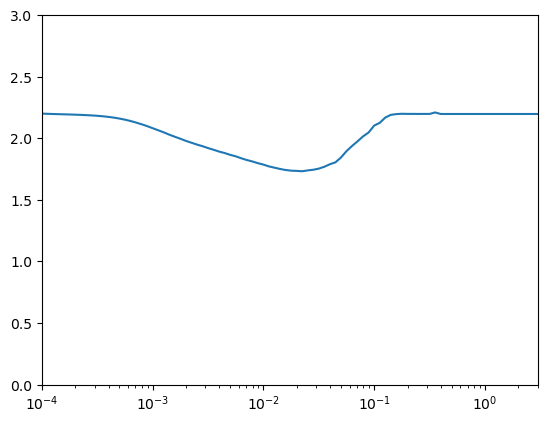

In [367]:
plt.semilogx(lr_history.history["lr"], lr_history.history["loss"])
plt.axis([1e-4, 3, 0, 3])

That looks realy realy bad. Maybe choose a learning rate of 0.01.

In [372]:
#Train it
model_nn_simple = model_nn_simple()

adam = keras.optimizers.Adam(lr=.01)
model_nn_simple.compile(loss='sparse_categorical_crossentropy', optimizer=adam)

model_nn_simple.fit(x_train, y_train, batch_size=32, epochs=2)

Epoch 1/2
25000/25000 [==============================] - 62s 2ms/step - loss: 2.1804
Epoch 2/2
25000/25000 [==============================] - 65s 3ms/step - loss: 2.1899


In [373]:
#Save it

model_nn_simple.save('model/model_nn_simple.h5')

In [187]:
#load it

model_nn_simple = load_model('model/model_nn_simple.h5')

Test the prediction quality

In [374]:
#given values
x = denorm(x_test[0])
x = np.asmatrix(x)
x = np.array(x)
x

array([[0., 0., 4., 0., 0., 0., 0., 0., 8.],
       [7., 0., 0., 2., 0., 9., 0., 0., 6.],
       [0., 1., 0., 0., 8., 0., 4., 5., 0.],
       [8., 0., 0., 0., 6., 0., 5., 0., 0.],
       [0., 7., 9., 0., 0., 4., 0., 0., 1.],
       [0., 0., 1., 0., 0., 5., 2., 3., 9.],
       [0., 0., 0., 6., 0., 2., 9., 0., 0.],
       [3., 0., 8., 0., 5., 7., 0., 2., 0.],
       [0., 0., 6., 4., 0., 0., 1., 0., 3.]])

In [375]:
#predicted value
pred = inference_sudoku(x_test[0],model_nn_simple,iterative=True, keepGiven = False)
pred 

1/1 [==============================] - 0s 17ms/step


array([[1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=int64)

In [376]:
#true values
y_test[0].reshape((9,9))+1

array([[6, 2, 4, 5, 1, 3, 7, 9, 8],
       [7, 8, 5, 2, 4, 9, 3, 1, 6],
       [9, 1, 3, 7, 8, 6, 4, 5, 2],
       [8, 3, 2, 9, 6, 1, 5, 4, 7],
       [5, 7, 9, 3, 2, 4, 8, 6, 1],
       [4, 6, 1, 8, 7, 5, 2, 3, 9],
       [1, 4, 7, 6, 3, 2, 9, 8, 5],
       [3, 9, 8, 1, 5, 7, 6, 2, 4],
       [2, 5, 6, 4, 9, 8, 1, 7, 3]])

That is quite a bad result. Just 1s inserted. But the runtime is quite fast.

Make a more complex NN

In [29]:
def model_nn_complex():

    model_nn_complex = keras.models.Sequential([ 
        keras.layers.Flatten(input_shape=(9,9,1)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(3000, activation='sigmoid'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(3000, activation='relu'),       
        keras.layers.BatchNormalization(),
        keras.layers.Dense(3000, activation='sigmoid'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(3000, activation='relu'),

        
        
        keras.layers.Dense(81*9, activation="relu"),
        keras.layers.Reshape((-1, 9)),
        #-1 is a placeholder for variable shapesize
        keras.layers.Activation('softmax')
    ])
    
    return  model_nn_complex

In [26]:
# Run the training with dynamic LR
lr_history = adjust_learning_rate(x_train[:1280], y_train[:1280], model_nn_complex())

Epoch 1/100
40/40 [==============================] - 19s 432ms/step - loss: 2.2457 - mae: 3.9136 - lr: 1.0000e-04
Epoch 2/100
40/40 [==============================] - 18s 458ms/step - loss: 2.0438 - mae: 3.9136 - lr: 1.1220e-04
Epoch 3/100
40/40 [==============================] - 20s 492ms/step - loss: 1.8759 - mae: 3.9136 - lr: 1.2589e-04
Epoch 4/100
40/40 [==============================] - 18s 445ms/step - loss: 1.7042 - mae: 3.9136 - lr: 1.4125e-04
Epoch 5/100
40/40 [==============================] - 18s 461ms/step - loss: 1.5320 - mae: 3.9136 - lr: 1.5849e-04
Epoch 6/100
40/40 [==============================] - 18s 453ms/step - loss: 1.3600 - mae: 3.9136 - lr: 1.7783e-04
Epoch 7/100
40/40 [==============================] - 18s 446ms/step - loss: 1.1952 - mae: 3.9136 - lr: 1.9953e-04
Epoch 8/100
40/40 [==============================] - 18s 447ms/step - loss: 1.0461 - mae: 3.9136 - lr: 2.2387e-04
Epoch 9/100
40/40 [==============================] - 18s 453ms/step - loss: 0.9154 - mae

More neurons per layer seem to be more decisive than more layers.
Also even adding non-linear actication functions doesn't have much impact on the minimum loss value.
But the learning rate curve seesm to be a little more stable by adding non-linear activations.

No matter the activation function, there seems to be a bump in the learning rate curve

Runtime gets very long in the end, but without achieving the  performance of the CNN.
It seems to be impossible to get good results with a simple neural network, no matter how many layers or neurons per layer you add.

(0.0001, 3.0, 0.0, 3.0)

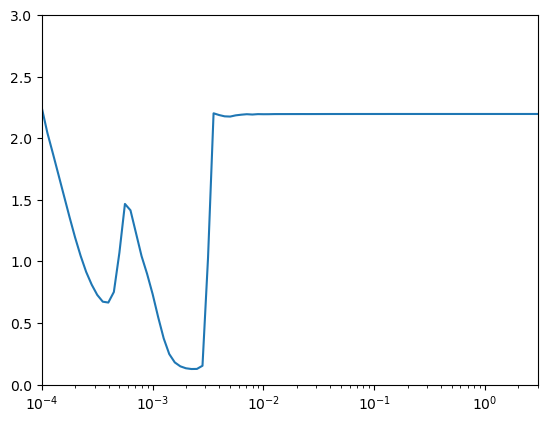

In [27]:
plt.semilogx(lr_history.history["lr"], lr_history.history["loss"])
plt.axis([1e-4, 3, 0, 3])

With a huge increase in neurons this actually works.
Really hard to tell the appropriate learning rate.
Maybe 0.002?

In [28]:
#Train it
model_nn_complex = model_nn_complex()

adam = keras.optimizers.Adam(lr=0.002)
model_nn_complex.compile(loss='sparse_categorical_crossentropy', optimizer=adam)

model_nn_complex.fit(x_train, y_train, batch_size=32, epochs=2)

Epoch 1/2
 1877/25000 [=>............................] - ETA: 2:54:15 - loss: 2.1977

KeyboardInterrupt: 

In [411]:
#Save it

model_nn_complex.save('model/model_nn_complex.h5')

In [ ]:
#load it

model_nn_complex = load_model('model/model_nn_complex.h5')

Test the prediction quality

In [412]:
#given values
x = denorm(x_test[0])
x = np.asmatrix(x)
x = np.array(x)
x

array([[0., 0., 4., 0., 0., 0., 0., 0., 8.],
       [7., 0., 0., 2., 0., 9., 0., 0., 6.],
       [0., 1., 0., 0., 8., 0., 4., 5., 0.],
       [8., 0., 0., 0., 6., 0., 5., 0., 0.],
       [0., 7., 9., 0., 0., 4., 0., 0., 1.],
       [0., 0., 1., 0., 0., 5., 2., 3., 9.],
       [0., 0., 0., 6., 0., 2., 9., 0., 0.],
       [3., 0., 8., 0., 5., 7., 0., 2., 0.],
       [0., 0., 6., 4., 0., 0., 1., 0., 3.]])

In [413]:
#predicted value
pred = inference_sudoku(x_test[0],model_nn_complex,iterative=True, keepGiven = False)
pred 

1/1 [==============================] - 0s 20ms/step


array([[1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=int64)

In [414]:
#true values
y_test[0].reshape((9,9))+1

array([[6, 2, 4, 5, 1, 3, 7, 9, 8],
       [7, 8, 5, 2, 4, 9, 3, 1, 6],
       [9, 1, 3, 7, 8, 6, 4, 5, 2],
       [8, 3, 2, 9, 6, 1, 5, 4, 7],
       [5, 7, 9, 3, 2, 4, 8, 6, 1],
       [4, 6, 1, 8, 7, 5, 2, 3, 9],
       [1, 4, 7, 6, 3, 2, 9, 8, 5],
       [3, 9, 8, 1, 5, 7, 6, 2, 4],
       [2, 5, 6, 4, 9, 8, 1, 7, 3]])

Judging from the learning curve this could be way better.

Use LSTMs like in the Coursera time series course

In [447]:
#this model was used for a binary classification of images in the Coursera course

def model_LSTM():
    
    model_LSTM = keras.models.Sequential([ 
      keras.layers.Flatten(input_shape=(9,9,1)),
      keras.layers.Reshape(target_shape = (81,1)),  
      keras.layers.Conv1D(filters=64, kernel_size=3,
                      activation="relu",
                      padding='same'),
      keras.layers.LSTM(64, return_sequences=True),
      keras.layers.LSTM(64),
      keras.layers.Dense(300, activation="relu"),
      keras.layers.Dense(300, activation="relu"),

      keras.layers.Dense(81*9, activation="relu"),
      keras.layers.Reshape((-1, 9)),
      keras.layers.Activation('softmax')  

    ]) 

    return model_LSTM

In [446]:
# Run the training with dynamic LR
lr_history = adjust_learning_rate(x_train[:1280], y_train[:1280], model_LSTM())

Epoch 1/100
40/40 [==============================] - 4s 45ms/step - loss: 2.1972 - mae: 3.9136 - lr: 1.0000e-04
Epoch 2/100
40/40 [==============================] - 2s 43ms/step - loss: 2.1972 - mae: 3.9136 - lr: 1.1220e-04
Epoch 3/100
40/40 [==============================] - 2s 40ms/step - loss: 2.1971 - mae: 3.9136 - lr: 1.2589e-04
Epoch 4/100
35/40 [=========================>....] - ETA: 0s - loss: 2.1968 - mae: 3.9136

KeyboardInterrupt: 

(0.0001, 3.0, 0.0, 3.0)

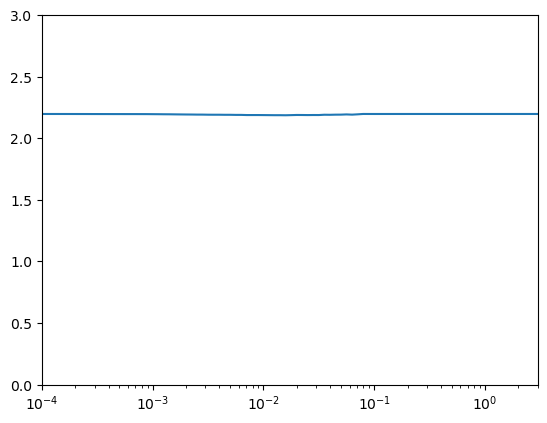

In [437]:
plt.semilogx(lr_history.history["lr"], lr_history.history["loss"])
plt.axis([1e-4, 3, 0, 3])

In [438]:
#Train it
model_LSTM = model_LSTM()

adam = keras.optimizers.Adam(lr=.001)
model_LSTM.compile(loss='sparse_categorical_crossentropy', optimizer=adam)

model_LSTM.fit(x_train, y_train, batch_size=32, epochs=2)

Epoch 1/2
25000/25000 [==============================] - 1029s 41ms/step - loss: 2.1965
Epoch 2/2
 9778/25000 [==========>...................] - ETA: 10:25 - loss: 2.1973

KeyboardInterrupt: 

In [ ]:
#Save it

model_LSTM.save('model/model_LSTM.h5')

In [ ]:
#load it

model_LSTM = load_model('model/model_LSTM.h5')

Test the prediction quality

In [ ]:
#given values
x = denorm(x_test[0])
x = np.asmatrix(x)
x = np.array(x)
x

In [ ]:
#predicted value
pred = inference_sudoku(x_test[0],model_LSTM,iterative=True, keepGiven = False)
pred 

In [ ]:
#true values
y_test[0].reshape((9,9))+1

In [ ]:
Make a Transformer Model

There is a package to make transformers and keras go together
https://pypi.org/project/keras-transformer/

## Or load pretrained model

In [31]:
model = keras.models.load_model('model/sudoku.model')

In [ ]:
#inspect the existing model

## Solve Sudoku by filling blank positions one by one

In [36]:
def norm(a):
    
    return (a/9)-.5

In [37]:
def denorm(a):
    
    return (a+.5)*9

In [38]:
def inference_sudoku(sample, model, iterative, keepGiven):
    #input should be a single sudoku in line form with 81 digits/components!! yes!!
    
    '''
        This function solve the sudoku by filling blank positions one by one.
    '''
    
    feat = copy.copy(sample)
    #using = just changes the reference in Python. You have to type copy.copy
    #feat is now our sample
    
    
    #here the iterative process shall be bypassed
    if iterative==False:
        out = model.predict(feat.reshape((1,9,9,1)))
        out = out.squeeze()
        pred = np.argmax(out, axis=1).reshape((9,9))+1 
        if keepGiven == True:
            for index, value in np.ndenumerate(feat):
                  feat[index[:2]] = pred[index[:2]]
            return(feat) #feat has 3 index dimensions, but just 2 as it is, so leave it
        return(pred)

    
    while(1):
    
        out = model.predict(feat.reshape((1,9,9,1)))  
        #assumption: reshape is applied to every component of feature
        #Why a 1x9x9x1 array and not simply a 9x9 array as an input to the predictor?
        out = out.squeeze()
        #squeeze removes the array dimensions of length 1

        pred = np.argmax(out, axis=1).reshape((9,9))+1 
        #argmax gives out the index of where a variable has its highest value
        #So here the position with the highest confidence is chosen?
        #Down below np.argmax seems to return the index, but pred is supposed to be the actual prediction.
        
        prob = np.around(np.max(out, axis=1).reshape((9,9)), 2)
        #around does round values equally up and down. So it could go round up, down, up ... etc.
        #rounded by the second decimal
        #max gets the biggest value, so most likely the probability or confidence
        
        feat = denorm(feat).reshape((9,9))
        mask = (feat==0)
        #zero is used to show that the true value is not known.
        #We index our NAs here with mask?
     
        if(mask.sum()==0):
            break
        
        #Mask detects all values
        
        prob_new = prob*mask
        #this is a matrix multiplication confidences (?) times the indices where a zero is
        #result should be in which rows and columns there is a high probability of a zero
        #In which not replaced zero is the confidence the highest?
        
        ind = np.argmax(prob_new)
        #In which not replaced zero is the confidence the highest?
        x, y = (ind//9), (ind%9)
        #ind is an index running from 1 to 81
        #// should return just the full value of ind/9, e.g. 24//9 = 2.
        #% is the modulo operator and returns the rest of the division, e.g. 24%2 = 6.
        #In total, the output is row and column of the entry with the highest confidence.
        

        val = pred[x][y]
        #extract the value with the highest confidence from  the pred matrix
        feat[x][y] = val
        #insert the best value now in the single sample
        feat = norm(feat)
        #norm the feat
    
    return pred

#This function seems to return the predicted full matrix

## Testing 100 games

In [45]:
def test_accuracy(feats, labels, model, iterative, keepGiven):
    #feats are probably a list of sample sudokus
    #labels are probably a list of true values
    
    start = timeit.default_timer() #to measure prediction time
    
    
    correct = 0
    
    #add another goodness measure
    #how much has the prediction gotten right, not just a binary response
    correct_perc = 0
    
    for i,feat in enumerate(feats):
        #are i and feat two different iterators
        #usually that only works wwith zip() data
        #since feats must be a kind of dataframe, maybe feat accesses a kind of column in that dataframe?
        
        pred = inference_sudoku(feat, model, iterative, keepGiven)
        #the full predicted matrix/solved puzzle
        
        true = labels[i].reshape((9,9))+1
        
        if(abs(true - pred).sum()==0):
            correct += 1
        #all the entries in the predicted matrix and the true matrix are the same
        #does it make sense to use another goodness of fit?
        
        #------------------------------------------------------
        
        #now add a count for numbers correctly classified
        absTrue = (abs(true - pred)==0).sum()#count the number of correctly classified in the sudoku
        my_print(absTrue)
        
        #How could you determine how many numbers were given to begin with?
        given = 81-(denorm(feat)==0).sum() 
        my_print(given)   
        #only in the denorm state are the empty components filled with 0s
        #this works
        
        #Finally a measure
        worst_possible = -(0-given)/(81-given)
        if absTrue > given:
            relTrue = (absTrue - given)/(81-given)
        else:
            relTrue = ((absTrue - given)/(81-given))/worst_possible
            #this should be -1 if no numbers were correctly classified
        my_print(relTrue)

        
        #how to update the relative true with every new sudoku?
        #multiply with number of sudokus solved so far, add the new value, and divide by the number
        #of sudokus currently solved
        #Python starts to iterate from 0!?
        correct_perc = (correct_perc*i+relTrue)/(i+1)
        my_print(correct_perc)
        
    print("The percentage of completely correctly classified Sudokus are: " + str(correct/feats.shape[0]))
    #.shape generally prints out the dimensions of an array
    #.shape[0] probably means how many rows are there in feats
    #here it means how many sudoku matrices are there
    #correct is the number of correctly predicted sudoku matrices
    
    print("The percentage of correctly classified numbers are: " + str(correct_perc))
    
    stop = timeit.default_timer()
    print('Seconds needed for prediction: ', stop - start)  
    
    
    one = correct/feats.shape[0]
    two = correct_perc
    three = [one, two, stop]
    three = np.array(three)
    
    #prediction time should also be outputted

    
    return(three)



Concerning the measure: the percentage of correctly classified numbers

I don't know if it is good for negative values, since we have a 1/9 chance of getting a number right by chance.
Thats means 9 true numbers by chance of 81 in total. That means the measure we should get, if we choose the numbers randomly.

In [46]:
given = 34
worst_possible = -(0-given)/(81-given)
random_expected_True = (9-given)/(81-given)/worst_possible
random_expected_True

-0.7352941176470588

Also from the code, the "iterative" process should just target the 0 and not overwrite any existing values by using the mask value. So there is no need to write code to keep the exisiting numbers.

Here the modell prediction can be started:
First 2 arguments are the data,
the 3rd is the model,
the 4th is if you want to insert numbers one by one,
the 5th is if you want to keep the given numbers or allow the model to overwrite it.

possible models for prediction:
model_conv_base
model_conv_base_simplified
model_conv_base_simplified_more
model_conv_base_simplified_lessFilters
model_conv_base_simplified_even_lessFilters
model_conv_base_simplified_even_lesser_Filters
model_conv_base_longer

model_base_for_pruning
model_lessFilters_for_pruning

Neural Networks and LSTMs didn't work so well, so omitted here

In [464]:
result_model_conv_base_ita = test_accuracy(x_test[:100], y_test[:100], model_conv_base, iterative=True, keepGiven = False)
result_model_conv_base_ita

1/1 [==============================] - 0s 18ms/step
81331.01.0The percentage of completely correctly classified Sudokus are: 1.0
The percentage of correctly classified numbers are: 1.0
Seconds needed for prediction:  223.99750529999437


array([1.00000000e+00, 1.00000000e+00, 1.12805725e+05])

In [471]:
result_model_conv_base_NONita = test_accuracy(x_test[:100], y_test[:100], model_conv_base, iterative=False, keepGiven = False)
result_model_conv_base_NONita

1/1 [==============================] - 0s 19ms/step
67330.70833333333333340.7252992655033029The percentage of completely correctly classified Sudokus are: 0.0
The percentage of correctly classified numbers are: 0.7252992655033029
Seconds needed for prediction:  5.119987400001264


array([0.00000000e+00, 7.25299266e-01, 1.13199092e+05])

model_conv_base_simplified

In [472]:
result_model_conv_base_simplified_ita = test_accuracy(x_test[:100], y_test[:100], model_conv_base_simplified, iterative=True, keepGiven = False)
result_model_conv_base_simplified_ita

1/1 [==============================] - 0s 17ms/step
81331.01.0The percentage of completely correctly classified Sudokus are: 1.0
The percentage of correctly classified numbers are: 1.0
Seconds needed for prediction:  215.86405259999447


array([1.00000000e+00, 1.00000000e+00, 1.13540794e+05])

In [473]:
result_model_conv_base_simplified_NONita = test_accuracy(x_test[:100], y_test[:100], model_conv_base_simplified, iterative=False, keepGiven = False)
result_model_conv_base_simplified_NONita

1/1 [==============================] - 0s 17ms/step
73330.83333333333333340.7063241174082955The percentage of completely correctly classified Sudokus are: 0.0
The percentage of correctly classified numbers are: 0.7063241174082955
Seconds needed for prediction:  4.825457400002051


array([0.00000000e+00, 7.06324117e-01, 1.13585849e+05])

model_conv_base_simplified_more

In [474]:
result_model_conv_base_simplified_more_ita = test_accuracy(x_test[:100], y_test[:100], model_conv_base_simplified_more, iterative=True, keepGiven = False)
result_model_conv_base_simplified_more_ita

1/1 [==============================] - 0s 17ms/step
49330.33333333333333330.3070627032897649The percentage of completely correctly classified Sudokus are: 0.0
The percentage of correctly classified numbers are: 0.3070627032897649
Seconds needed for prediction:  215.60093970000162


array([0.00000000e+00, 3.07062703e-01, 1.13841853e+05])

In [475]:
result_model_conv_base_simplified_more_NONita = test_accuracy(x_test[:100], y_test[:100], model_conv_base_simplified_more, iterative=False, keepGiven = False)
result_model_conv_base_simplified_more_NONita

1/1 [==============================] - 0s 18ms/step
46330.27083333333333330.35518276675455895The percentage of completely correctly classified Sudokus are: 0.0
The percentage of correctly classified numbers are: 0.35518276675455895
Seconds needed for prediction:  4.969210999988718


array([0.00000000e+00, 3.55182767e-01, 1.13954211e+05])

model_conv_base_simplified_lessFilters

In [476]:
result_model_conv_base_simplified_lessFilters_ita = test_accuracy(x_test[:100], y_test[:100], model_conv_base_simplified_lessFilters, iterative=True, keepGiven = False)
result_model_conv_base_simplified_lessFilters_ita

1/1 [==============================] - 0s 17ms/step
78330.93750.9555401154448829The percentage of completely correctly classified Sudokus are: 0.64
The percentage of correctly classified numbers are: 0.9555401154448829
Seconds needed for prediction:  211.3571474000055


array([6.40000000e-01, 9.55540115e-01, 1.14221198e+05])

In [477]:
result_model_conv_base_simplified_lessFilters_NONita = test_accuracy(x_test[:100], y_test[:100], model_conv_base_simplified_lessFilters, iterative=False, keepGiven = False)
result_model_conv_base_simplified_lessFilters_NONita

1/1 [==============================] - 0s 17ms/step
67330.70833333333333340.6731441422760897The percentage of completely correctly classified Sudokus are: 0.0
The percentage of correctly classified numbers are: 0.6731441422760897
Seconds needed for prediction:  5.102941300006933


array([0.00000000e+00, 6.73144142e-01, 1.14335839e+05])

model_conv_base_simplified_even_lessFilters

In [478]:
result_model_conv_base_simplified_even_lessFilters_ita = test_accuracy(x_test[:100], y_test[:100], model_conv_base_simplified_even_lessFilters, iterative=True, keepGiven = False)
result_model_conv_base_simplified_even_lessFilters_ita

1/1 [==============================] - 0s 16ms/step
81331.01.0The percentage of completely correctly classified Sudokus are: 1.0
The percentage of correctly classified numbers are: 1.0
Seconds needed for prediction:  210.95807930000592


array([1.000000e+00, 1.000000e+00, 1.146441e+05])

In [480]:
result_model_conv_base_simplified_even_lessFilters_NONita = test_accuracy(x_test[:100], y_test[:100], model_conv_base_simplified_even_lessFilters, iterative=False, keepGiven = False)
result_model_conv_base_simplified_even_lessFilters_NONita

1/1 [==============================] - 0s 18ms/step
67330.70833333333333340.6972641639449485The percentage of completely correctly classified Sudokus are: 0.0
The percentage of correctly classified numbers are: 0.6972641639449485
Seconds needed for prediction:  5.069903700001305


array([0.00000000e+00, 6.97264164e-01, 1.14973873e+05])

model_conv_base_simplified_even_lesser_Filters

In [481]:
result_model_conv_base_simplified_even_lesser_Filters_ita = test_accuracy(x_test[:100], y_test[:100], model_conv_base_simplified_even_lesser_Filters, iterative=True, keepGiven = False)
result_model_conv_base_simplified_even_lesser_Filters_ita

1/1 [==============================] - 0s 16ms/step
60330.56250.465013739115751The percentage of completely correctly classified Sudokus are: 0.0
The percentage of correctly classified numbers are: 0.465013739115751
Seconds needed for prediction:  209.17931799999496


array([0.00000000e+00, 4.65013739e-01, 1.15234676e+05])

In [482]:
result_model_conv_base_simplified_even_lesser_Filters_NONita = test_accuracy(x_test[:100], y_test[:100], model_conv_base_simplified_even_lesser_Filters, iterative=False, keepGiven = False)
result_model_conv_base_simplified_even_lesser_Filters_NONita

1/1 [==============================] - 0s 16ms/step
63330.6250.5170125782690507The percentage of completely correctly classified Sudokus are: 0.0
The percentage of correctly classified numbers are: 0.5170125782690507
Seconds needed for prediction:  4.970656000004965


array([0.00000000e+00, 5.17012578e-01, 1.15696809e+05])

model_base_for_pruning

In [483]:
result_model_base_for_pruning_ita = test_accuracy(x_test[:100], y_test[:100], model_base_for_pruning, iterative=True, keepGiven = False)
result_model_base_for_pruning_ita

1/1 [==============================] - 0s 26ms/step
81331.01.0The percentage of completely correctly classified Sudokus are: 1.0
The percentage of correctly classified numbers are: 1.0
Seconds needed for prediction:  252.42521950000082


array([1.00000000e+00, 1.00000000e+00, 1.15998177e+05])

In [484]:
result_model_base_for_pruning_NONita = test_accuracy(x_test[:100], y_test[:100], model_base_for_pruning, iterative=False, keepGiven = False)
result_model_base_for_pruning_NONita

1/1 [==============================] - 0s 26ms/step
67330.70833333333333340.7252992655033029The percentage of completely correctly classified Sudokus are: 0.0
The percentage of correctly classified numbers are: 0.7252992655033029
Seconds needed for prediction:  6.082344300011755


array([0.00000000e+00, 7.25299266e-01, 1.16041650e+05])

model_lessFilters_for_pruning

In [485]:
result_model_lessFilters_for_pruning_ita = test_accuracy(x_test[:100], y_test[:100], model_lessFilters_for_pruning, iterative=True, keepGiven = False)
result_model_lessFilters_for_pruning_ita

1/1 [==============================] - 0s 19ms/step
81331.01.0The percentage of completely correctly classified Sudokus are: 1.0
The percentage of correctly classified numbers are: 1.0
Seconds needed for prediction:  220.5542138000019


array([1.00000000e+00, 1.00000000e+00, 1.16285651e+05])

In [486]:
result_model_lessFilters_for_pruning_NONita = test_accuracy(x_test[:100], y_test[:100], model_lessFilters_for_pruning, iterative=False, keepGiven = False)
result_model_lessFilters_for_pruning_NONita

1/1 [==============================] - 0s 17ms/step
67330.70833333333333340.6972641639449485The percentage of completely correctly classified Sudokus are: 0.0
The percentage of correctly classified numbers are: 0.6972641639449485
Seconds needed for prediction:  5.346347099999548


array([0.00000000e+00, 6.97264164e-01, 1.16370520e+05])

model_conv_base_longer

In [47]:
result_model_conv_base_longer_ita = test_accuracy(x_test[:100], y_test[:100], model_conv_base_longer, iterative=True, keepGiven = False)
result_model_conv_base_longer_ita

1/1 [==============================] - 0s 20ms/step
81331.01.0The percentage of completely correctly classified Sudokus are: 1.0
The percentage of correctly classified numbers are: 1.0
Seconds needed for prediction:  297.3036964999992


array([1.0000000e+00, 1.0000000e+00, 1.1839916e+04])

In [48]:
result_model_conv_base_longer_NONita = test_accuracy(x_test[:100], y_test[:100], model_conv_base_longer, iterative=False, keepGiven = False)
result_model_conv_base_longer_NONita

1/1 [==============================] - 0s 19ms/step
68330.72916666666666660.7224145224879966The percentage of completely correctly classified Sudokus are: 0.0
The percentage of correctly classified numbers are: 0.7224145224879966
Seconds needed for prediction:  5.960544800000207


array([0.00000000e+00, 7.22414522e-01, 1.19819689e+04])

model_conv_base_complex

In [57]:
result_model_conv_base_complex_ita = test_accuracy(x_test[:100], y_test[:100], model_conv_base_complex, iterative=True, keepGiven = False)
result_model_conv_base_complex_ita

1/1 [==============================] - 0s 35ms/step
58330.52083333333333340.7341965535921428The percentage of completely correctly classified Sudokus are: 0.0
The percentage of correctly classified numbers are: 0.7341965535921428
Seconds needed for prediction:  256.9038260999987


array([0.00000000e+00, 7.34196554e-01, 2.42022477e+04])

In [56]:
result_model_conv_base_complex_NONita = test_accuracy(x_test[:100], y_test[:100], model_conv_base_complex, iterative=False, keepGiven = False)
result_model_conv_base_complex_NONita

1/1 [==============================] - 0s 20ms/step
72330.81250.7562432625686724The percentage of completely correctly classified Sudokus are: 0.0
The percentage of correctly classified numbers are: 0.7562432625686724
Seconds needed for prediction:  6.148156500003097


array([0.00000000e+00, 7.56243263e-01, 2.38713319e+04])

Oneshot has higher accurary than the iterative approach, which should not be true.

model_conv_base_31_13

In [73]:
result_model_conv_base_31_13_ita = test_accuracy(x_test[:100], y_test[:100], model_conv_base_31_13, iterative=True, keepGiven = False)
result_model_conv_base_31_13_ita


1/1 [==============================] - 0s 19ms/step
81331.01.0The percentage of completely correctly classified Sudokus are: 1.0
The percentage of correctly classified numbers are: 1.0
Seconds needed for prediction:  261.2120582999996


array([1.00000000e+00, 1.00000000e+00, 3.40826017e+04])

In [74]:
result_model_conv_base_31_13_NONita = test_accuracy(x_test[:100], y_test[:100], model_conv_base_31_13, iterative=False, keepGiven = False)
result_model_conv_base_31_13_NONita

1/1 [==============================] - 0s 19ms/step
69330.750.7106675487339557The percentage of completely correctly classified Sudokus are: 0.0
The percentage of correctly classified numbers are: 0.7106675487339557
Seconds needed for prediction:  5.883811400002742


array([0.00000000e+00, 7.10667549e-01, 3.44024976e+04])

Not really better than the base model.

# Debugging section for test purposes

In [282]:
denorm(x_test[0])

array([[[0.],
        [0.],
        [4.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [8.]],

       [[7.],
        [0.],
        [0.],
        [2.],
        [0.],
        [9.],
        [0.],
        [0.],
        [6.]],

       [[0.],
        [1.],
        [0.],
        [0.],
        [8.],
        [0.],
        [4.],
        [5.],
        [0.]],

       [[8.],
        [0.],
        [0.],
        [0.],
        [6.],
        [0.],
        [5.],
        [0.],
        [0.]],

       [[0.],
        [7.],
        [9.],
        [0.],
        [0.],
        [4.],
        [0.],
        [0.],
        [1.]],

       [[0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [5.],
        [2.],
        [3.],
        [9.]],

       [[0.],
        [0.],
        [0.],
        [6.],
        [0.],
        [2.],
        [9.],
        [0.],
        [0.]],

       [[3.],
        [0.],
        [8.],
        [0.],
        [5.],
        [7.],
        [0.],
      

In [283]:
given = 81-(denorm(x_test[0])==0).sum() 
given

34

In [281]:
pred = inference_sudoku(x_test[0],model_conv_base_simplified,iterative=True, keepGiven = False)
pred 
#looks like a sudoku matrix

1/1 [==============================] - 0s 19ms/step


array([[1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 9, 1, 1, 1],
       [1, 1, 1, 1, 8, 1, 1, 1, 1],
       [8, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 9, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 9, 1, 1],
       [1, 1, 1, 1, 1, 7, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=int64)

In [204]:
true = y_test[:100][0].reshape((9,9))+1
true

#okay, lookss good as well

array([[6, 2, 4, 5, 1, 3, 7, 9, 8],
       [7, 8, 5, 2, 4, 9, 3, 1, 6],
       [9, 1, 3, 7, 8, 6, 4, 5, 2],
       [8, 3, 2, 9, 6, 1, 5, 4, 7],
       [5, 7, 9, 3, 2, 4, 8, 6, 1],
       [4, 6, 1, 8, 7, 5, 2, 3, 9],
       [1, 4, 7, 6, 3, 2, 9, 8, 5],
       [3, 9, 8, 1, 5, 7, 6, 2, 4],
       [2, 5, 6, 4, 9, 8, 1, 7, 3]])

In [205]:
absTrue = (abs(true - pred)==0).sum()
absTrue

#everything classified correctly

81

In [206]:
relTrue = (absTrue - given)/(81-given)
relTrue

#this also worked well

1.0

In [207]:
#correct_perc = 0
correct_perc = (correct_perc*1+relTrue)/(1+1)
correct_perc


1.0

In [208]:
#cool = np.array([1, 2, 3, 4])
#cool

#cool = np.array([relTrue, correct_perc])
#cool

relTrue, correct_perc = nice
nice.size

#type(cool).__name__



NameError: name 'nice' is not defined

In [242]:
#iterate over a numpy matrix
#https://www.w3schools.com/python/numpy/numpy_array_iterating.asp

feat = copy.copy(denorm(x_test[0]))
#feat.squeeze     

for index, value in np.ndenumerate(feat):
      feat[index[:2]] = pred[index[:2]]
        #print(index[:2])

feat
#that seems to work

array([[[6.],
        [2.],
        [4.],
        [5.],
        [1.],
        [3.],
        [7.],
        [9.],
        [8.]],

       [[7.],
        [8.],
        [5.],
        [2.],
        [4.],
        [9.],
        [3.],
        [1.],
        [6.]],

       [[9.],
        [1.],
        [3.],
        [7.],
        [8.],
        [6.],
        [4.],
        [5.],
        [2.]],

       [[8.],
        [3.],
        [2.],
        [9.],
        [6.],
        [1.],
        [5.],
        [4.],
        [7.]],

       [[5.],
        [7.],
        [9.],
        [3.],
        [2.],
        [4.],
        [8.],
        [6.],
        [1.]],

       [[4.],
        [6.],
        [1.],
        [8.],
        [7.],
        [5.],
        [2.],
        [3.],
        [9.]],

       [[1.],
        [4.],
        [7.],
        [6.],
        [3.],
        [2.],
        [9.],
        [8.],
        [5.]],

       [[3.],
        [9.],
        [8.],
        [1.],
        [5.],
        [7.],
        [6.],
      

## Test your own game

In [10]:
def solve_sudoku(game):
    
    game = game.replace('\n', '')
    game = game.replace(' ', '')
    #remove any line breaks and space signs
    game = np.array([int(j) for j in game]).reshape((9,9,1))
    game = norm(game)
    game = inference_sudoku(game)
    return game

In [13]:
game = '''
          0 8 0 0 3 2 0 0 1
          7 0 3 0 8 0 0 0 2
          5 0 0 0 0 7 0 3 0
          0 5 0 0 0 1 9 7 0
          6 0 0 7 0 9 0 0 8
          0 4 7 2 0 0 0 5 0
          0 2 0 6 0 0 0 0 9
          8 0 0 0 9 0 3 0 5
          3 0 0 8 2 0 0 1 0
      '''

game = solve_sudoku(game)

print('solved puzzle:\n')
print(game)

1/1 [==============================] - 0s 19ms/step
solved puzzle:

[[4 8 6 5 3 2 7 9 1]
 [7 9 3 4 8 1 5 6 2]
 [5 1 2 9 6 7 8 3 4]
 [2 5 8 3 1 4 9 7 6]
 [6 3 1 7 5 9 2 4 8]
 [9 4 7 2 6 8 1 5 3]
 [1 2 5 6 7 3 4 8 9]
 [8 7 4 1 9 6 3 2 5]
 [3 6 9 8 2 5 6 1 7]]


In [ ]:
np.sum(game, axis=1)

## Visualize the filters of a CNN

https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/

Maybe start with model_conv_base_simplified_even_lessFilters, because it has very few filters.

In [527]:
# summarize filter shapes
for layer in model_conv_base_simplified_even_lessFilters.layers:
 # check for convolutional layer
 if 'conv2d' not in layer.name:
    continue

In [531]:
model_conv_base_simplified_even_lessFilters.layers[2].name

'conv2d_77'

In [532]:
filters, biases =  model_conv_base_simplified_even_lessFilters.layers[2].get_weights()

In [495]:
# get filter weights
#filters, biases = layer.get_weights()
#print(layer.name, filters.shape)

ValueError: not enough values to unpack (expected 2, got 0)

In [ ]:
# retrieve weights from the second hidden layer
#filters, biases = model.layers[1].get_weights()

In [533]:
# The weight values will likely be small positive and negative values centered around 0.0.
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

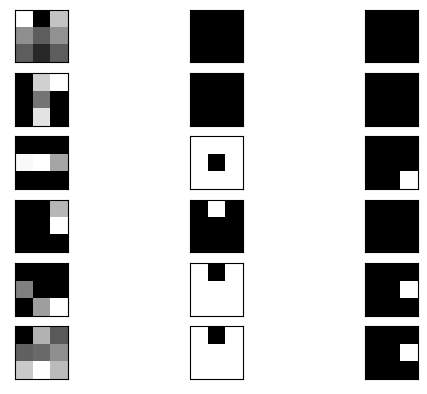

In [535]:
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
         # get the filter
         f = filters[:, :, :, i]
         # plot each channel separately
         for j in range(3):
                     # specify subplot and turn of axis
                     ax = plt.subplot(n_filters, 3, ix)
                     ax.set_xticks([])
                     ax.set_yticks([])
                     # plot filter channel in grayscale
                     plt.imshow(f[:, :, j], cmap='gray')
                     ix += 1
# show the figure
plt.show()




Okay, since a Sudoku has an interpretable 3 x 3 structure, one should be able to interprete a 3 x 3 logically, but for me that is hard to do.
Maybe, all black filters or all white filters are bad, because there is not much information in such filters. Especially black don't let any
kind of information through. All white might make sense, since these layers are still from a multi player CNN. So there might still be a more detailed
filter in the next layer.

## Things I wanted to do, but didn't really do

This would probably be a very long list.

More models
- LSTM: try to make a better model than the one I have
- Transformer: try it out, ther eis enough data there
- more models in general

Enhance the iterative base model
- enhance the calculation time of the iterative approach by shorten the time of matrix multiplications
- try to fill in more than one number into the Sudoku 
- avoid overfitting, I suspect that our base model overfits
- could you design the CNN in a way, that the entry with highest confidence is mostly right, but therefore very fast